
Bryan Chi Fai Pang

Student ID: 501210081

TMU: The Chang School of Continuing Education

CIND 820 Big Data Analytics Project

Dr Ceni BABAOGLU

10 November 2023

#### Github Repository


https://github.com/bryantoca/capstone_project

Please note this notebook takse around 15 mintues to run / render.
An html version as well as NBViewer version are available on line.


# Initial Results and Code

## Part 1: Creation of Train, Validation, and Test Sets

1. **Train-Validate-Final Test Split:**

    - 80% train-validate split, 20% test set.
    - Anomaly records removed from train-validate sets.





2. **Handling Abnormal Records:**

    - Records with zero credit taken and grades throughout university but labeled as 'Graduate' moved.



3. **Target Mapping:**

    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


## Part 2: Model Selection Using 10-fold Cross Validation

Using the following models:
- Logistic Regression
- Random Forest (n_estimators=10 and n_estimators=100)
- Support Vector Machine (SVM)
- SVM with a linear kernel
- Gradient Boosting
- XGB Classifier

Performance Metrics:
- Average Accuracy
- Average F1 Score
- Standard Deviation (SD)

## Part 3: Research Question Analysis

Subsets of the dataset are trained and tested using Random Forest and XGB Classifier with 80-20 train-validate split.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Full Classification Reports are displayed for each subset.


## Part 1: Creation of Train, Validation, and Test Sets

In [124]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from statistics import mean, stdev
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix












In [125]:
# Using the datetime.now() at the beginning and at the end to check time 
# needed to run the codes.

# datetime object containing current date and time
Start = datetime.now()
 
print("Notebook started at ", Start )



Notebook started at  2023-11-21 16:25:55.216750


1. **Train-Validate-Final Test Split:**
    - 80% train-validate split, 20% test set (this test set is not use but for final test /results)
    

In [126]:
# creating train_valide and test_set 
# test_set is for final testing

data = pd.read_csv("data.csv",sep=";") 

#data = pd.read_csv("data_cat.csv", sep=";")

#train_validate_set, test_set = train_test_split(df, test_size = 0.2, random_state=76)

- Anomaly Detection : records removed from train-validate sets.
These records are students that are classified as "Graduate", but with zero for all curricular units taken as well as zero as grades. 


In [127]:

anomalies = data[(data['Target'] == 'Graduate') & (data.iloc[:, 21:33].eq(0).all(axis=1))]
anomalies_to_print = anomalies[["Target"]+list(data.columns[21:33])]
anomalies_to_print.head()



Target  Curricular units 1st sem (credited)  \
20   Graduate                                    0   
66   Graduate                                    0   
101  Graduate                                    0   
405  Graduate                                    0   
527  Graduate                                    0   

     Curricular units 1st sem (enrolled)  \
20                                     0   
66                                     0   
101                                    0   
405                                    0   
527                                    0   

     Curricular units 1st sem (evaluations)  \
20                                        0   
66                                        0   
101                                       0   
405                                       0   
527                                       0   

     Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
20                                     0                               0.0   
66                                     0                               0.0   
101                                    0                               0.0   
405                                    0                               0.0   
527                                    0                               0.0   

     Curricular units 1st sem (without evaluations)  \
20                                                0   
66                                                0   
101                                               0   
405                                               0   
527                                               0   

     Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
20                                     0                                    0   
66                                     0                                    0   
101                                    0                                    0   
405                                    0                                    0   
527                                    0                                    0   

     Curricular units 2nd sem (evaluations)  \
20                                        0   
66                                        0   
101                                       0   
405                                       0   
527                                       0   

     Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
20                                     0                               0.0   
66                                     0                               0.0   
101                                    0                               0.0   
405                                    0                               0.0   
527                                    0                               0.0   

     Curricular units 2nd sem (without evaluations)  
20                                                0  
66                                                0  
101                                               0  
405                                               0  
527                                               0

In [128]:
anomal = data[(data['Target'] == 'Graduate') & (data.iloc[:, 21:33].eq(0).all(axis=1))]
anomal.index

Int64Index([  20,   66,  101,  405,  527,  534,  557,  574,  679,  722,  728,
             789,  821,  869,  881, 1002, 1050, 1192, 1302, 1350, 1363, 1377,
            1425, 1507, 1512, 1575, 1585, 1600, 1658, 1751, 1883, 1889, 1890,
            1898, 2008, 2026, 2124, 2143, 2175, 2194, 2230, 2235, 2328, 2356,
            2371, 2387, 2406, 2496, 2508, 2637, 2656, 2793, 2814, 2899, 2920,
            2955, 3023, 3024, 3135, 3160, 3317, 3405, 3447, 3481, 3683, 3707,
            3717, 3732, 3745, 3928, 3946, 4291, 4353, 4365, 4370],
           dtype='int64')

In [129]:
data.drop(anomal.index,inplace=True)

3. **Target Mapping:**
    - Strings converted to numeric using the following mapping:
        {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [130]:
data_counts = data['Target'].value_counts()

print(data_counts)

Graduate    2134
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


In [131]:




# Create a mapping dicctionary for Target, as XGBoost take only numeric value.
mapping = {'Dropout':0, 'Enrolled':1, 'Graduate':2}

data['Target']=data['Target'].map(mapping)


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4349 non-null   int64  
 1   Application mode                                4349 non-null   int64  
 2   Application order                               4349 non-null   int64  
 3   Course                                          4349 non-null   int64  
 4   Daytime evening attendance                      4349 non-null   int64  
 5   Previous qualification                          4349 non-null   int64  
 6   Previous qualification (grade)                  4349 non-null   float64
 7   Nacionality                                     4349 non-null   int64  
 8   Mother's qualification                          4349 non-null   int64  
 9   Father's qualification                   

## Part 2: Model Selection Using 10-fold Cross Validation

Using the following models:

- Random Forest (n_estimators=10 and n_estimators=100)
- Support Vector Machine (SVM)
- SVM with a linear kernel
- Gradient Boosting
- XGB Classifier

Performance Metrics:
- Average Accuracy
- Average F1 Score
- Standard Deviation (SD)

Using 10-fold cross validation to give an initial results to see how different algorithms.

First, for each algorithm, F1 and Accuracy  is reported of each fold and then average F1 and Accuracy, as well as SD are reported. 

Summary of these models 

#### Results

Of the 6 models trained, Random Forest (n_estimator=100), Gradient Boosting and XGB Classifer have the highest accuracy and F1 score.

Based on these results, the project will focus of these three models and continue with  feature selection / feature engineering as well 
model hyperparametr tuning.



## Part 3: Research Question Analysis

Research question:

Dose inclusion of Demographic and Socioeconmoic data improve dropout prediction, and by how much ?
To annsewer the question, subsets of datasets are created and for initial results, Random Forest and XGB Classifier are used.

For each subset, Classification Report, Feature Importance and Permutation Importance are showned.

Subsets of the dataset are trained and tested using Random Forest and XGB Classifier with 80-20 train-validate split.

Subsets:
1. S1: Academic, Macroeconomic
2. S2: Academic, Macroeconomics, Demographic
3. S3: Academic, Macroeconomics, Socioeconomic
4. S4: Academic, Macroeconomic, Demographic, Socioeconomic
5. S5: Demographic, Socioeconomic

Full Classification Reports are displayed for each subset.

Creating the subsets

### Demographic Columns
- Marital status
- Nacionality
- Displaced
- Gender
- Age at enrollment
- International

### Socioeconomic Columns
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation
- Educational special needs
- Debtor
- Tuition fees up to date
- Scholarship holder

### Macroeconomic Columns
- Unemployment rate
- Inflation rate
- GDP

### Academic Columns
- Application mode
- Application order
- Course
- Daytime evening attendance
- Previous qualification
- Previous qualification (grade)
- Admission grade
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (evaluations)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (evaluations)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (without evaluations)

### Target Column
- Target


In [132]:
demographic_columns = ['Marital status','Nacionality','Displaced','Gender','Age at enrollment','International']
socioeconomic_columns =["Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Educational special needs','Debtor',
 'Tuition fees up to date','Scholarship holder']
macroeconomic_columns = ['Unemployment rate','Inflation rate','GDP']
academic_columns = [
 'Application mode',
 'Application order',
 'Course',
 'Daytime evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)'
 ]
target_s = ['Target']

In [133]:
s1 = data[target_s + macroeconomic_columns + academic_columns]
s2 = data[target_s + macroeconomic_columns + academic_columns + demographic_columns]
s3 = data[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns]
s4 = data[target_s + macroeconomic_columns + academic_columns + socioeconomic_columns + demographic_columns]
s5 = data[target_s + demographic_columns + socioeconomic_columns ]

The 5 datasets with Random Forest

Results for s1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7448
              precision    recall  f1-score   support

     Dropout       0.77      0.75      0.76       289
    Enrolled       0.50      0.32      0.39       168
    Graduate       0.78      0.92      0.84       413

    accuracy                           0.74       870
   macro avg       0.69      0.66      0.66       870
weighted avg       0.72      0.74      0.73       870



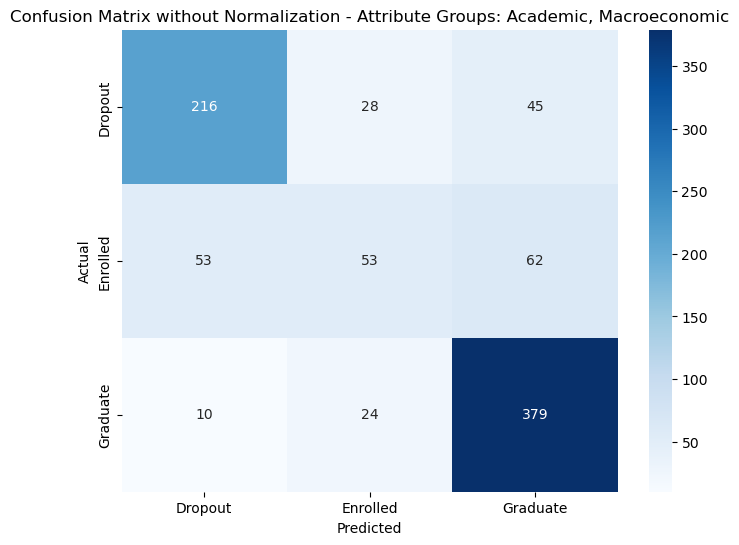

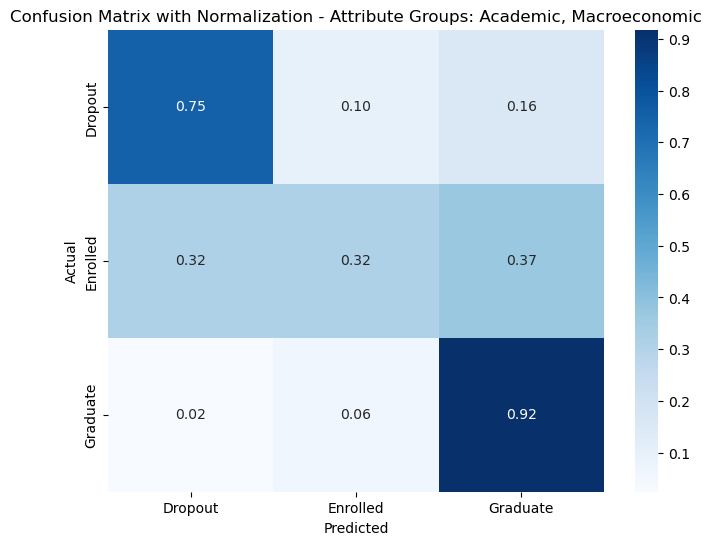

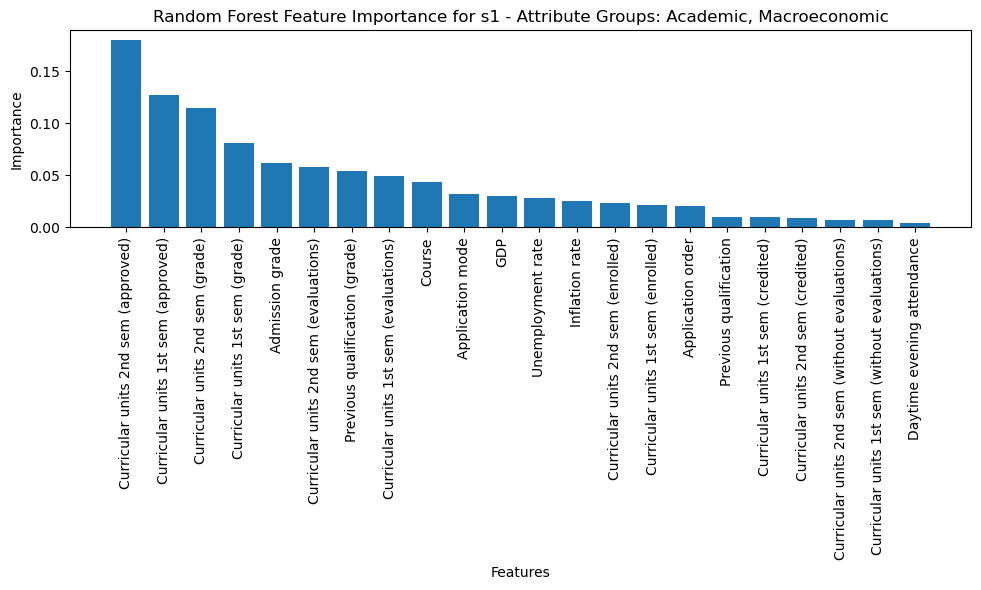

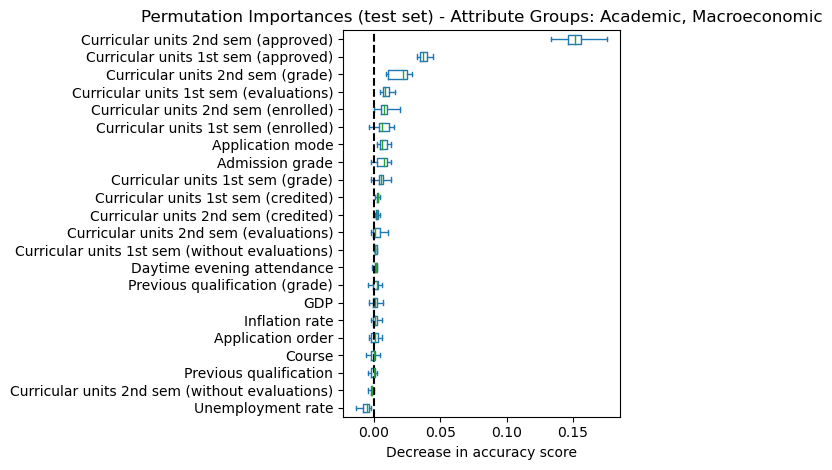

-------------------------------------------------------------

Results for s2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7575
              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.77       289
    Enrolled       0.56      0.33      0.42       168
    Graduate       0.78      0.93      0.85       413

    accuracy                           0.76       870
   macro avg       0.71      0.67      0.68       870
weighted avg       0.74      0.76      0.74       870



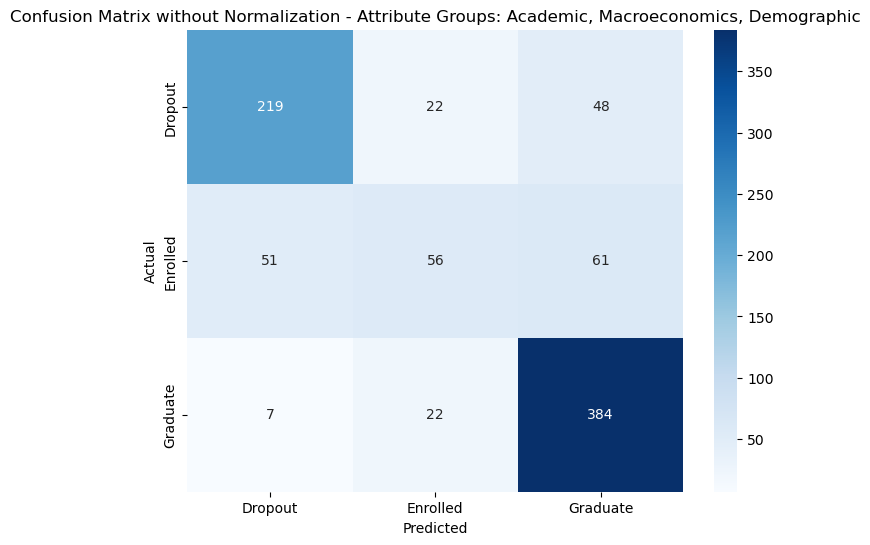

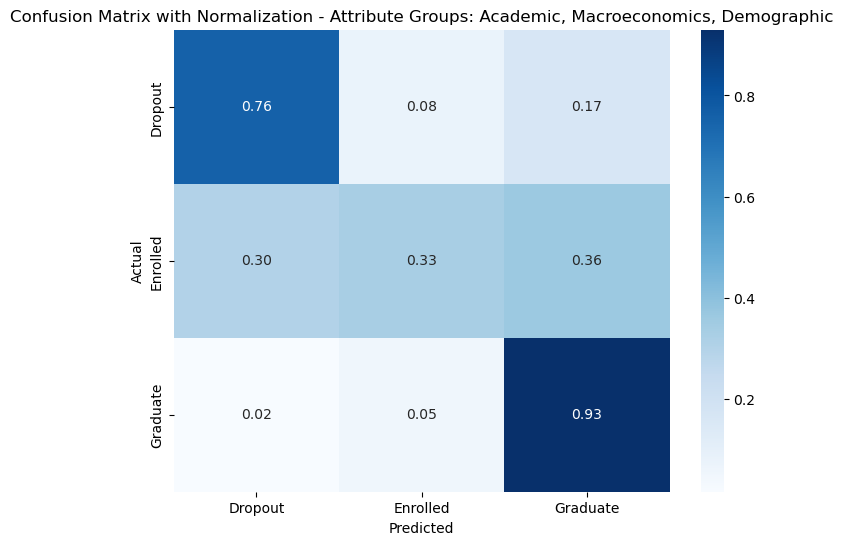

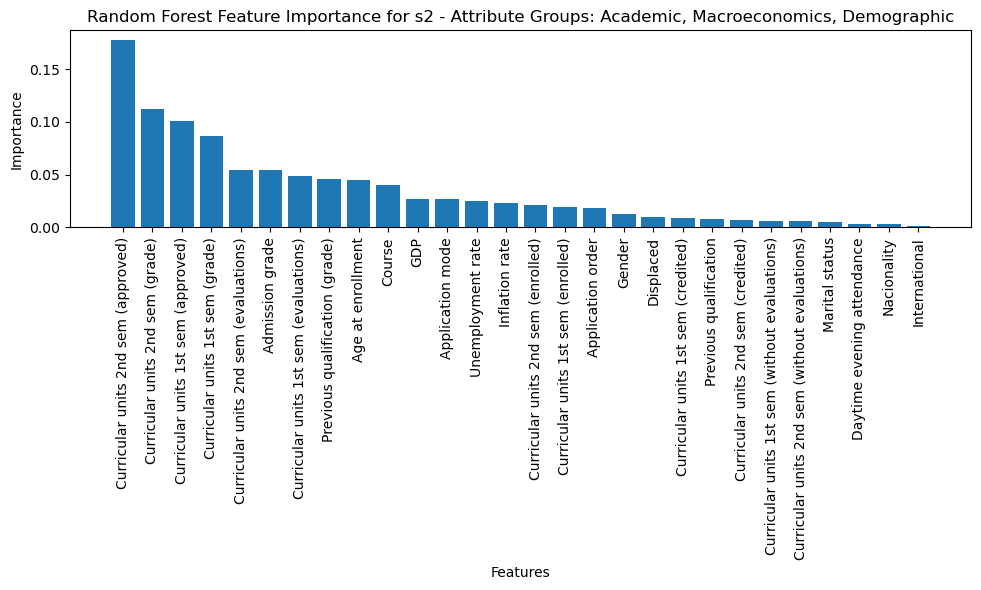

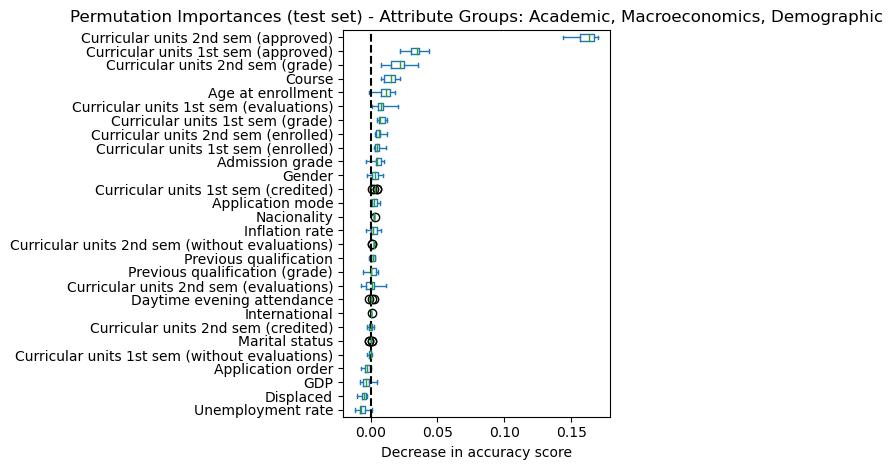

-------------------------------------------------------------

Results for s3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7805
              precision    recall  f1-score   support

     Dropout       0.83      0.79      0.81       289
    Enrolled       0.60      0.40      0.48       168
    Graduate       0.79      0.93      0.86       413

    accuracy                           0.78       870
   macro avg       0.74      0.71      0.71       870
weighted avg       0.77      0.78      0.77       870



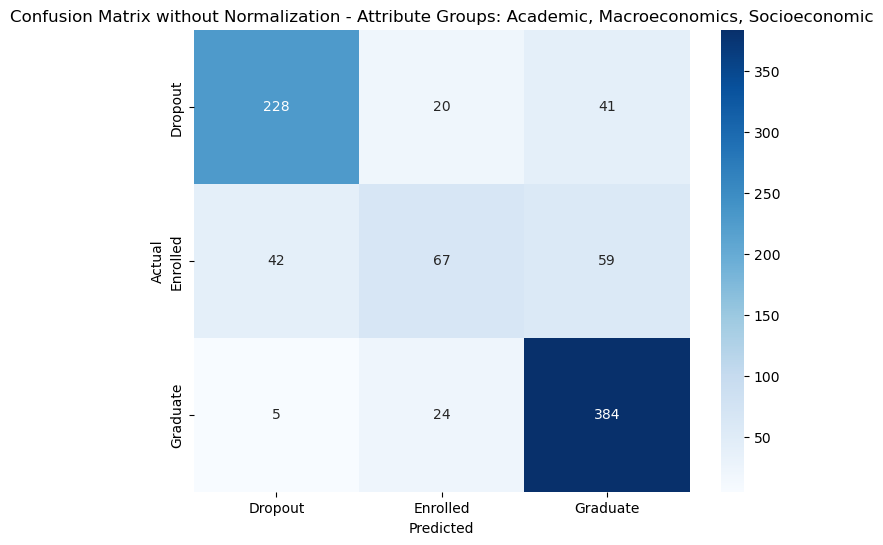

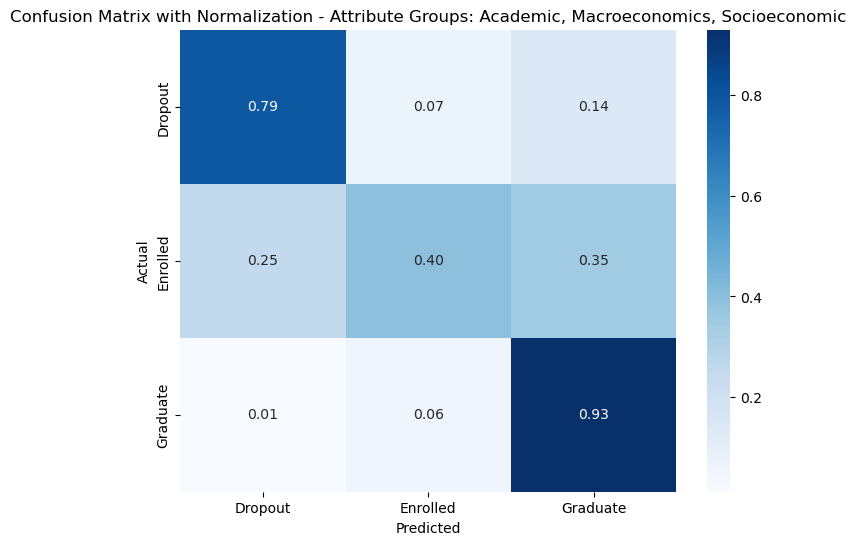

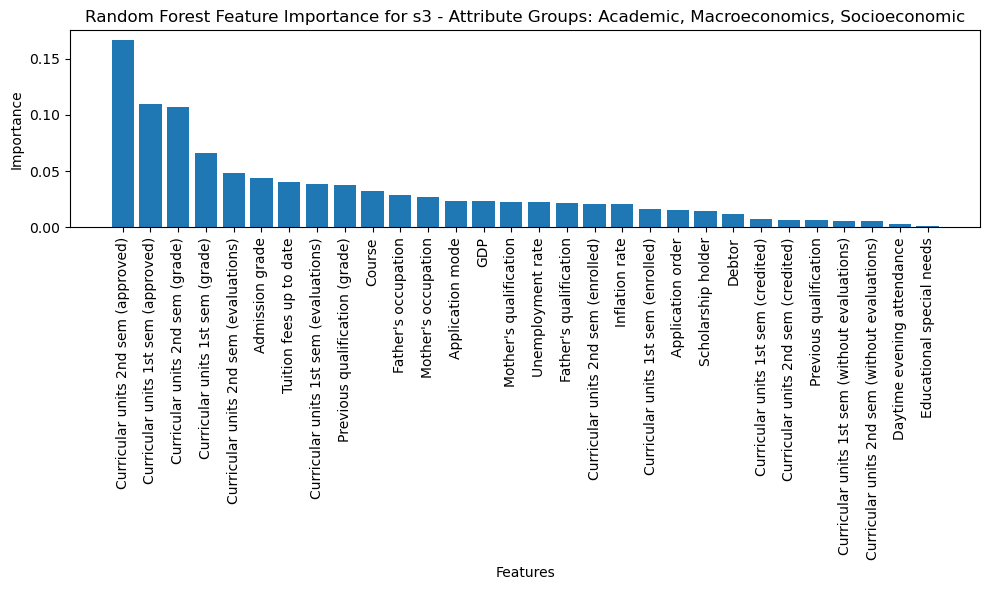

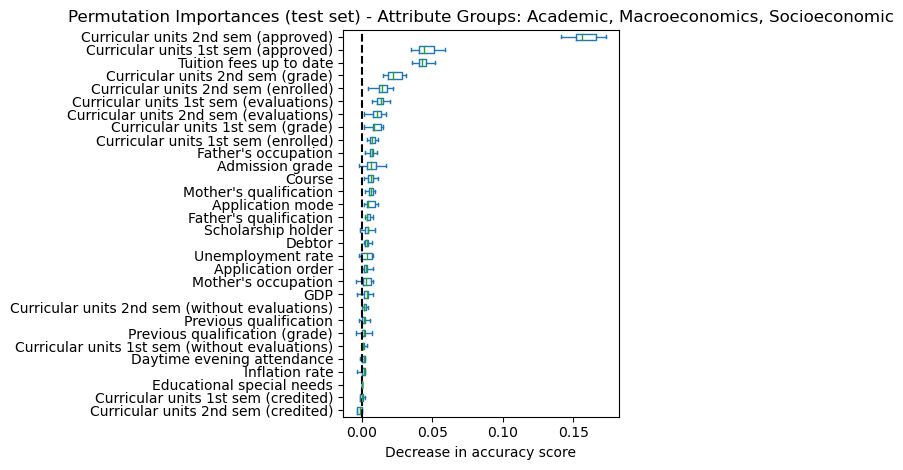

-------------------------------------------------------------

Results for s4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7701
              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.80       289
    Enrolled       0.55      0.39      0.46       168
    Graduate       0.80      0.92      0.85       413

    accuracy                           0.77       870
   macro avg       0.72      0.70      0.70       870
weighted avg       0.76      0.77      0.76       870



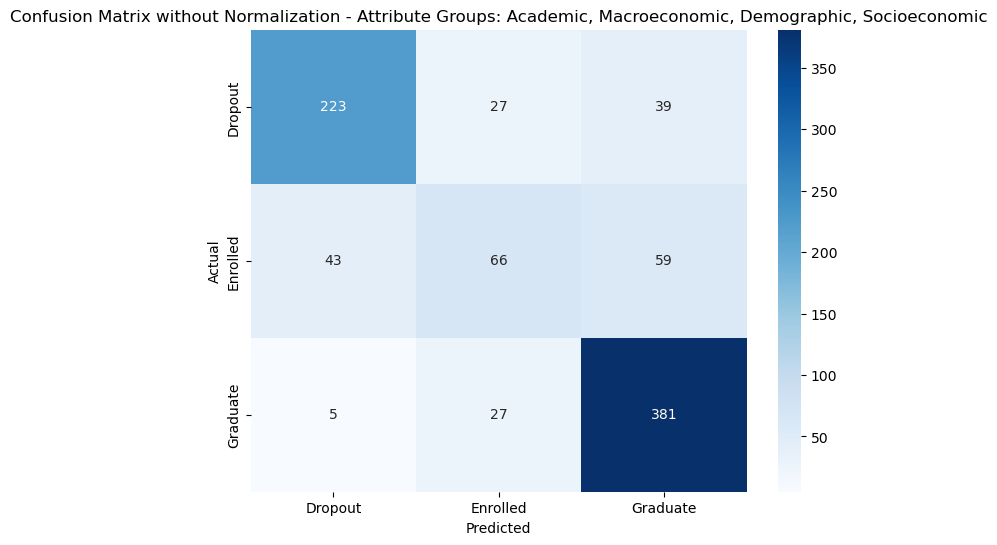

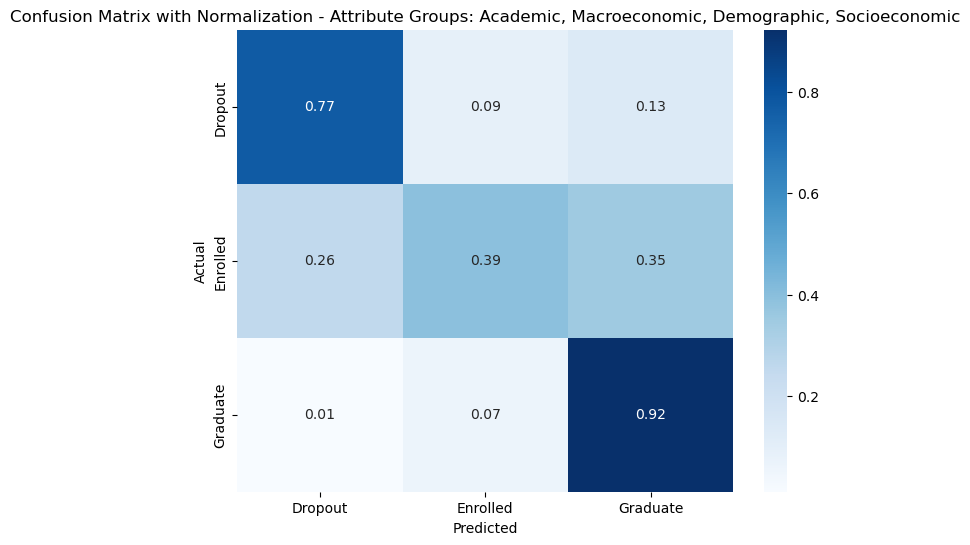

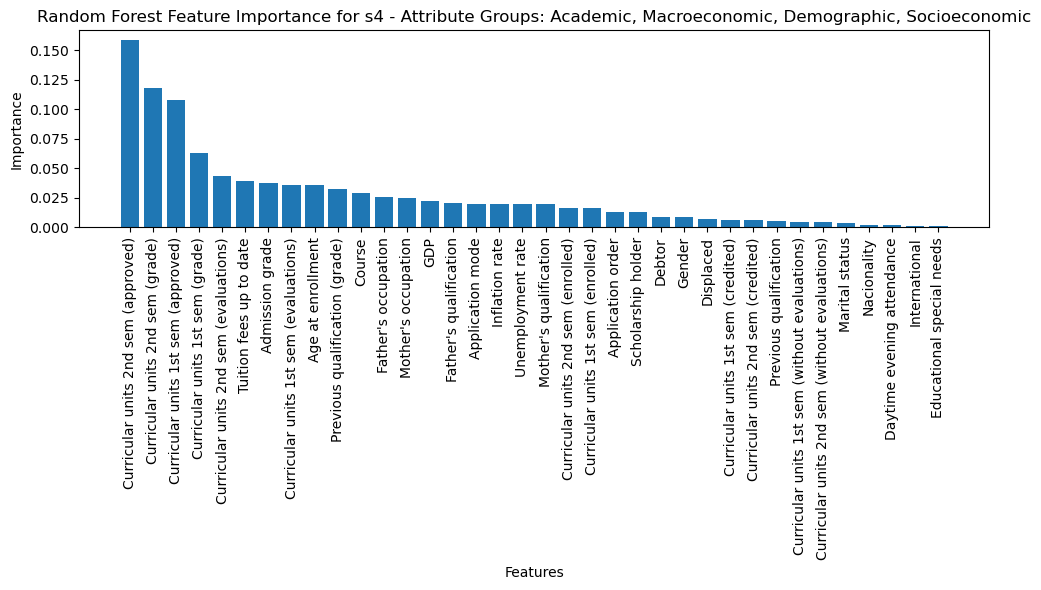

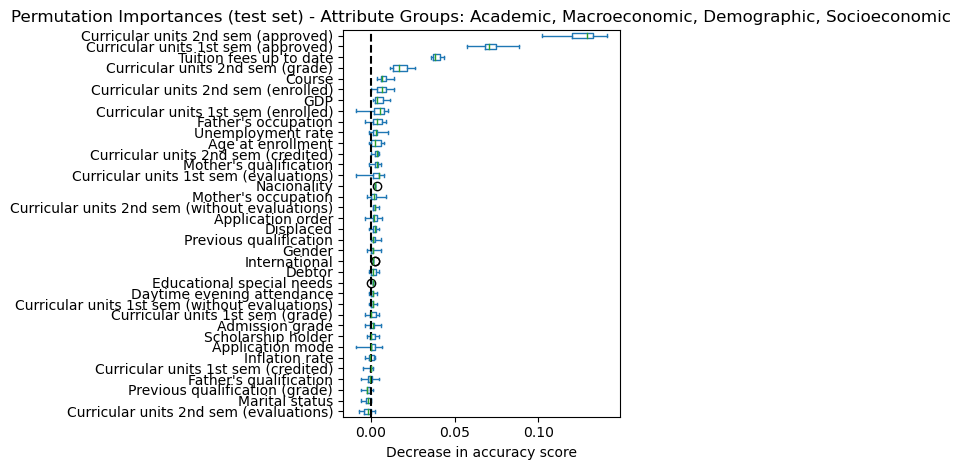

-------------------------------------------------------------

Results for s5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.5724
              precision    recall  f1-score   support

     Dropout       0.60      0.58      0.59       289
    Enrolled       0.27      0.15      0.19       168
    Graduate       0.61      0.74      0.67       413

    accuracy                           0.57       870
   macro avg       0.50      0.49      0.48       870
weighted avg       0.54      0.57      0.55       870



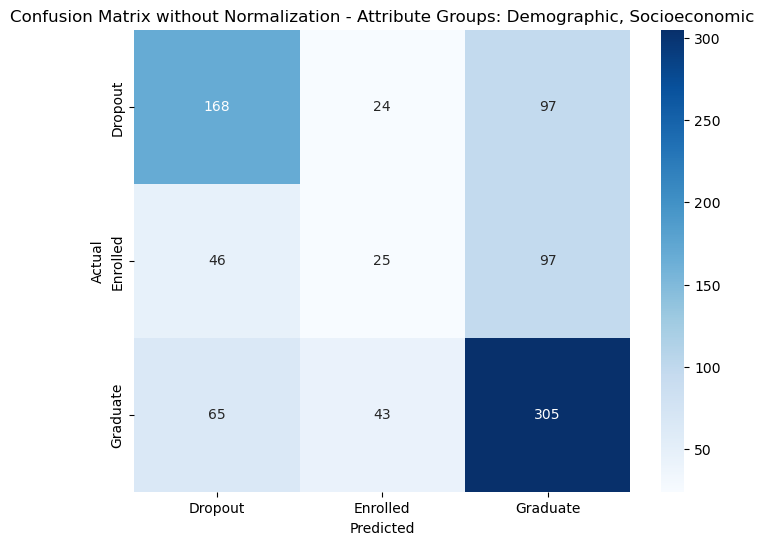

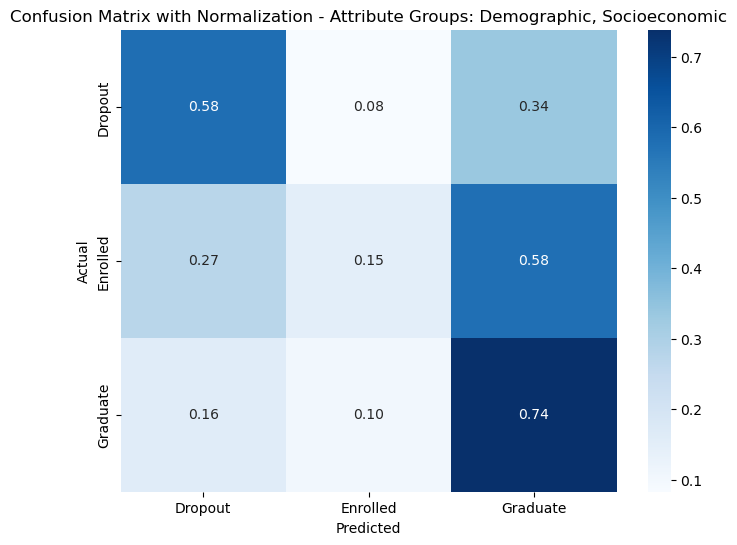

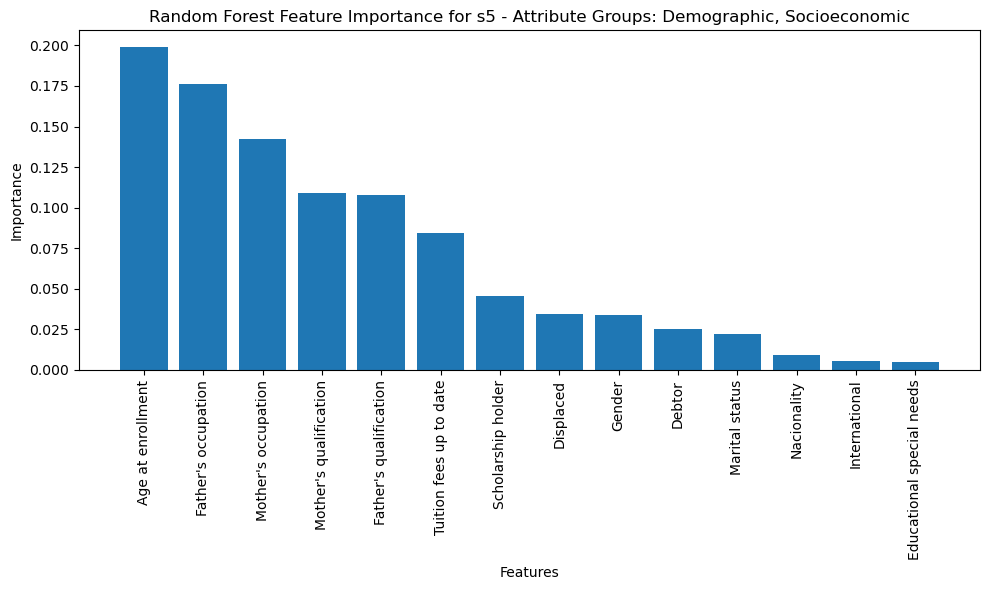

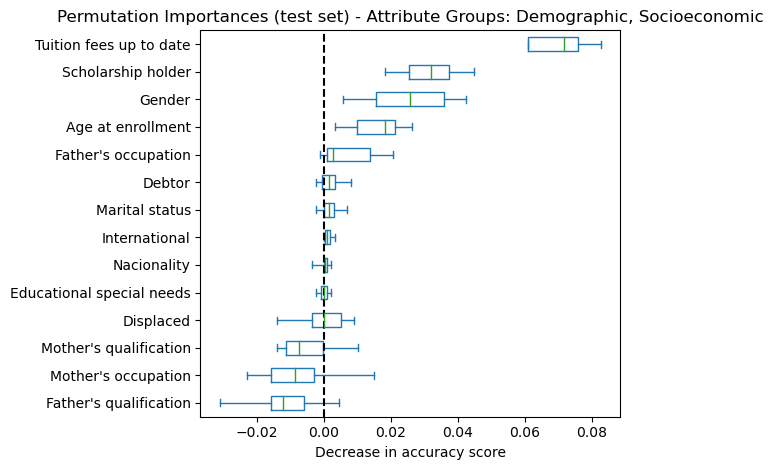

-------------------------------------------------------------



In [134]:


dataframes = [s1, s2, s3, s4, s5]  

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]


results = []

for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=76)




    
       



    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=76)
    rf_classifier.fit(X_train, y_train)
    predictions = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(y_test, predictions, target_names=target_names)
    results.append((accuracy, report))

    print(f"Results for s{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    # Confusion Matrix without normalization
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    feature_importance = rf_classifier.feature_importances_
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Random Forest Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_train.columns[sorted_importances_idx],
    )

    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances (test set) - Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    plt.show()
    

    print("-------------------------------------------------------------\n")


The 5 datasets with Gradient Booster Classifer 

Results for s1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7310
              precision    recall  f1-score   support

     Dropout       0.77      0.71      0.74       289
    Enrolled       0.44      0.32      0.37       168
    Graduate       0.78      0.92      0.84       413

    accuracy                           0.73       870
   macro avg       0.67      0.65      0.65       870
weighted avg       0.71      0.73      0.72       870



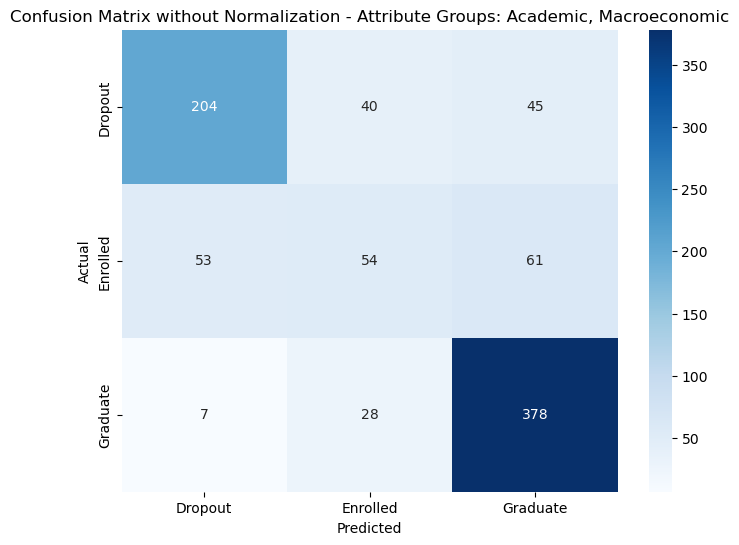

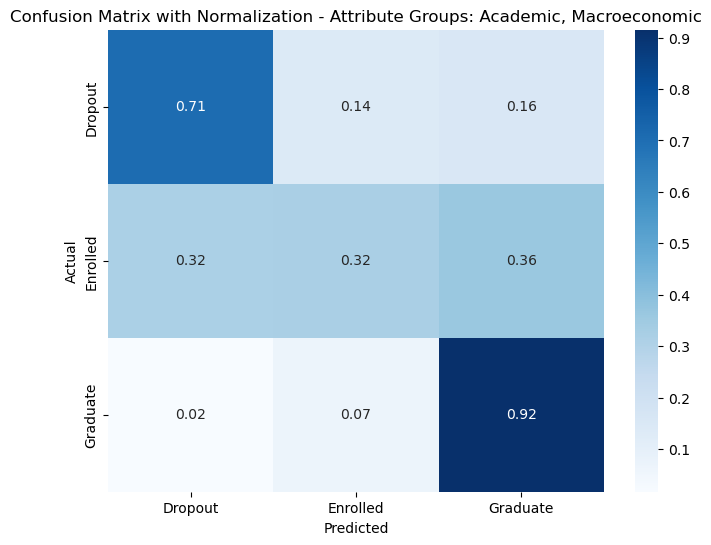

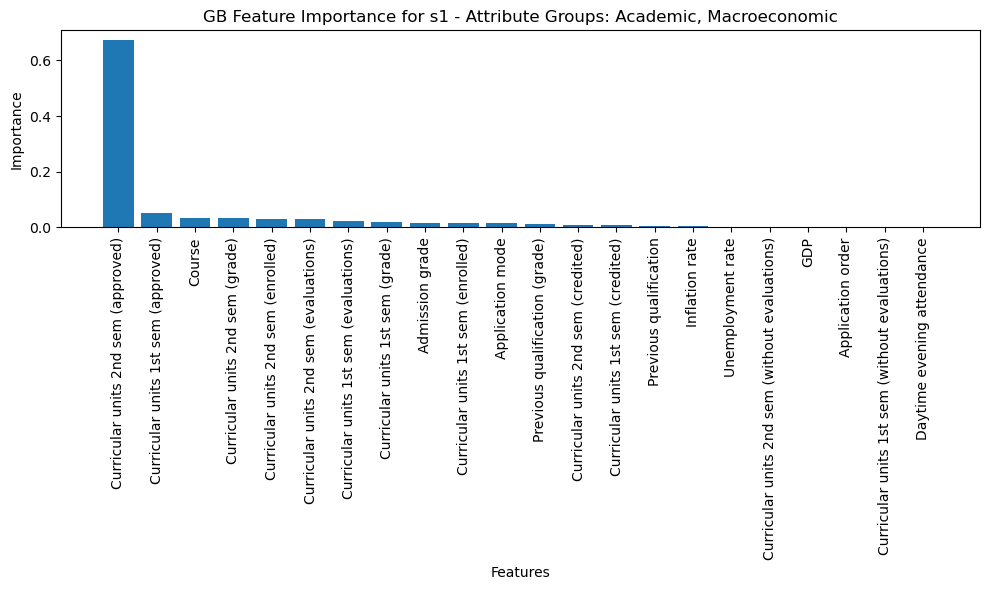

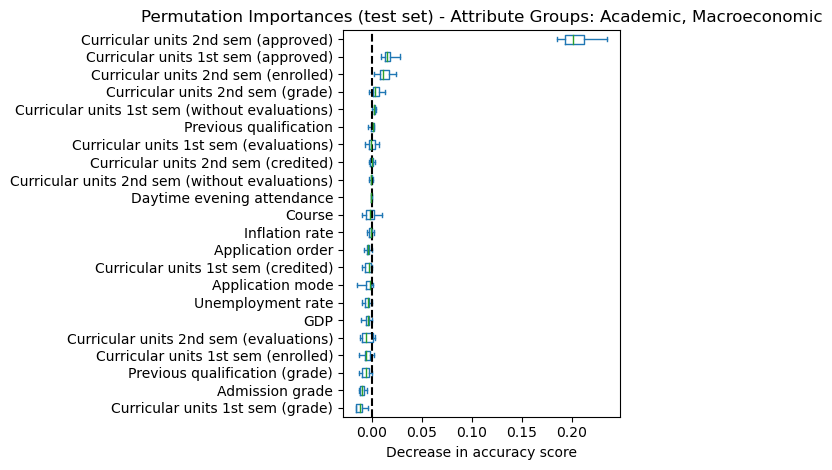

-------------------------------------------------------------

Results for s2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7506
              precision    recall  f1-score   support

     Dropout       0.80      0.72      0.76       289
    Enrolled       0.52      0.39      0.44       168
    Graduate       0.78      0.92      0.85       413

    accuracy                           0.75       870
   macro avg       0.70      0.68      0.68       870
weighted avg       0.74      0.75      0.74       870



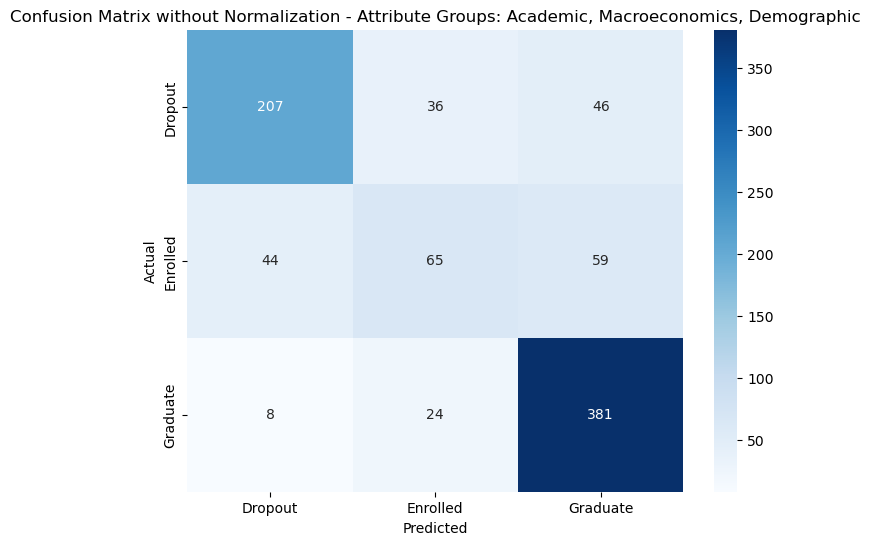

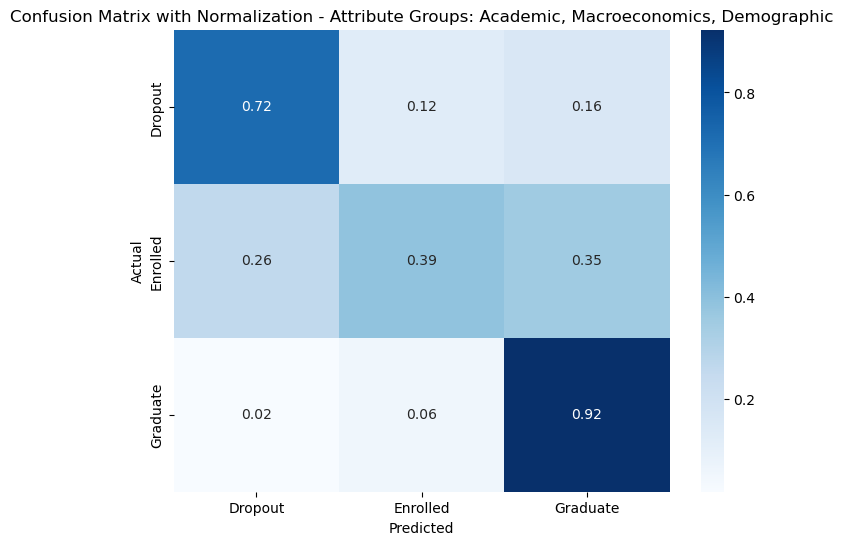

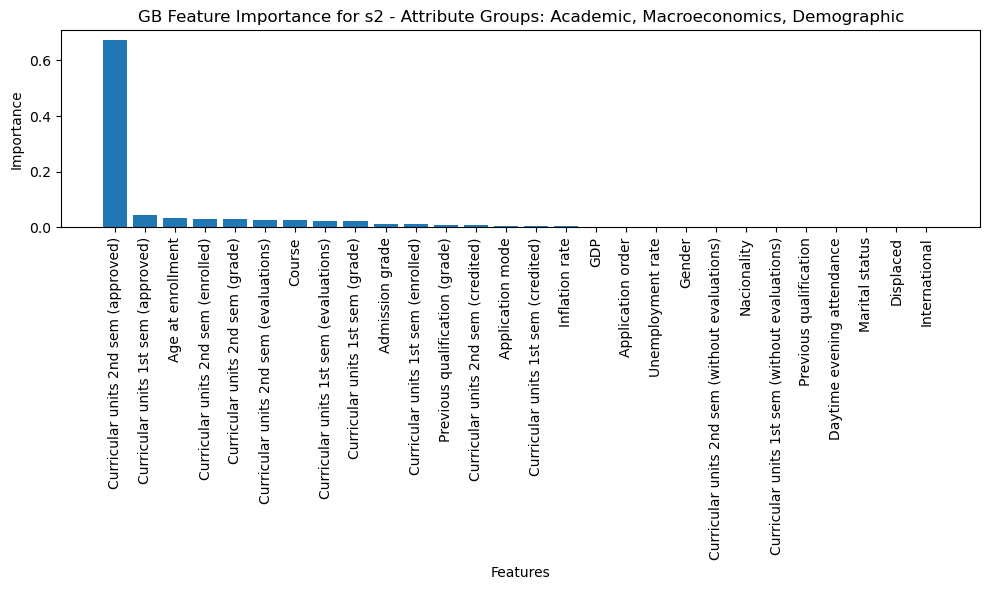

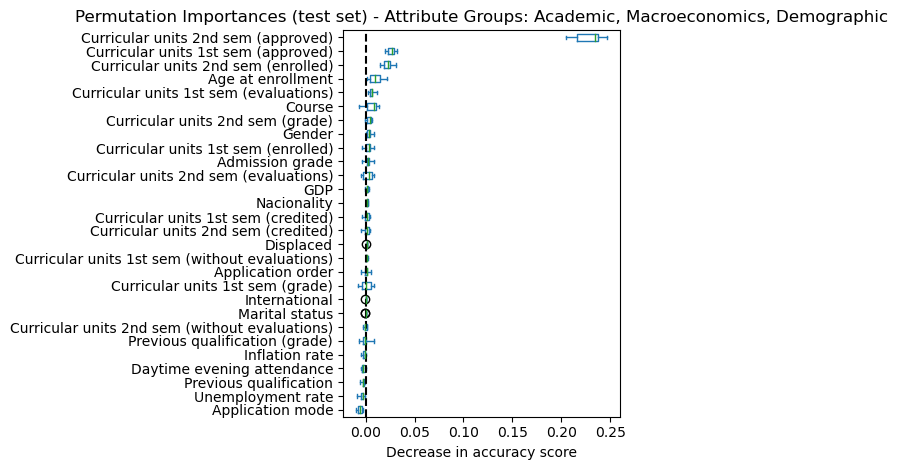

-------------------------------------------------------------

Results for s3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7759
              precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80       289
    Enrolled       0.56      0.44      0.49       168
    Graduate       0.80      0.92      0.85       413

    accuracy                           0.78       870
   macro avg       0.73      0.71      0.72       870
weighted avg       0.77      0.78      0.77       870



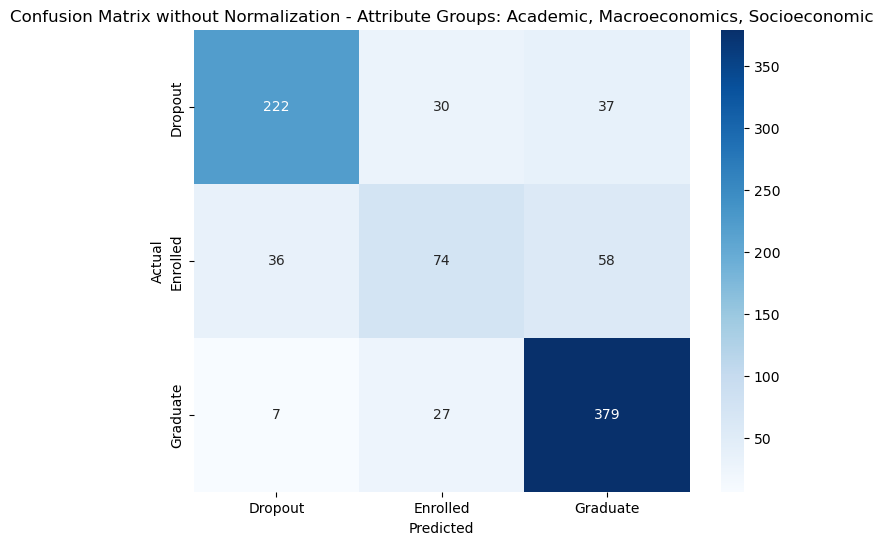

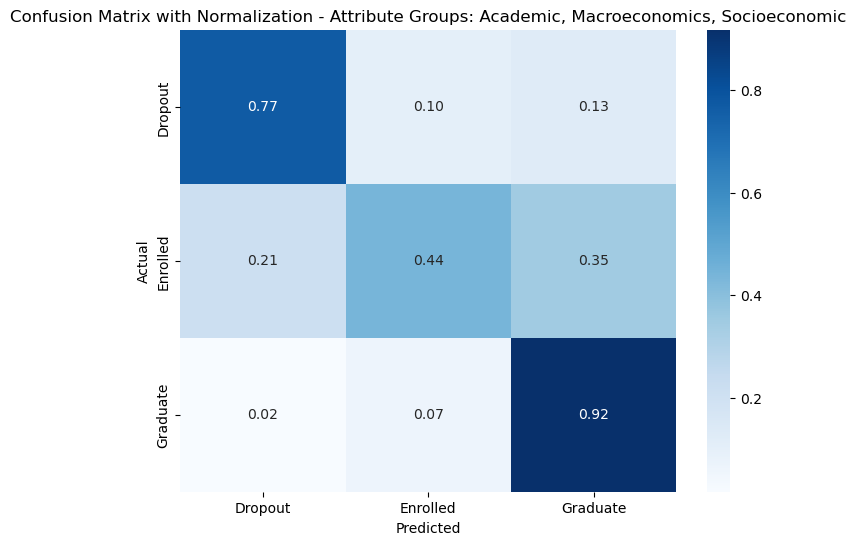

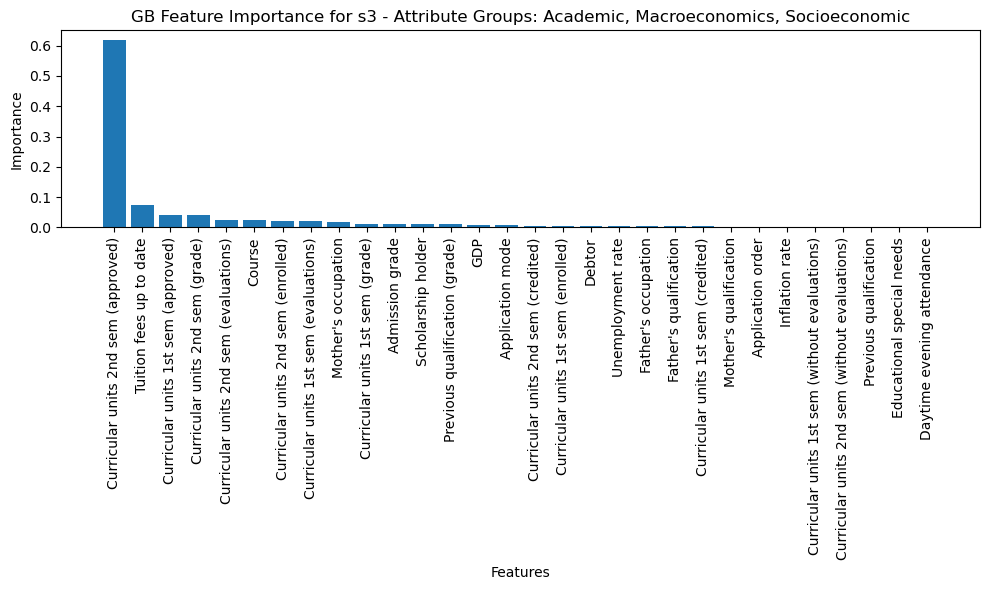

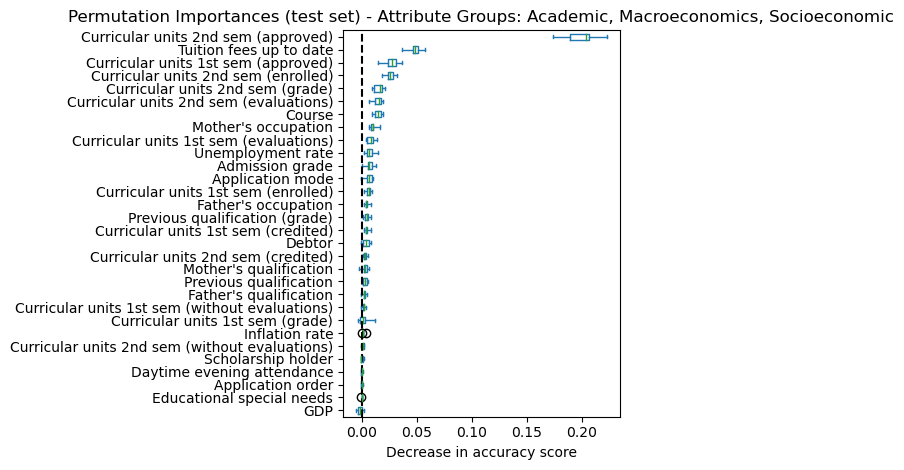

-------------------------------------------------------------

Results for s4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7724
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       289
    Enrolled       0.55      0.43      0.48       168
    Graduate       0.79      0.92      0.85       413

    accuracy                           0.77       870
   macro avg       0.73      0.70      0.71       870
weighted avg       0.76      0.77      0.76       870



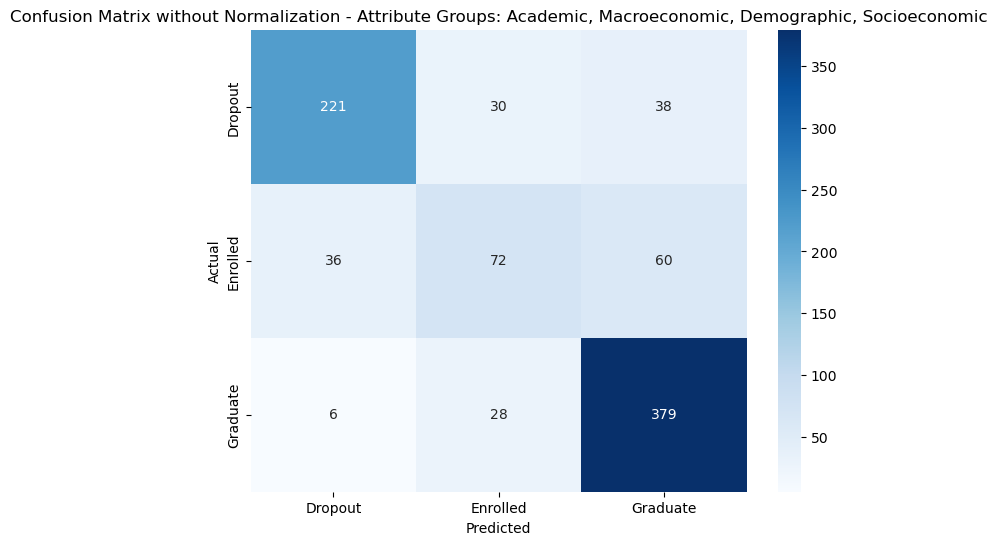

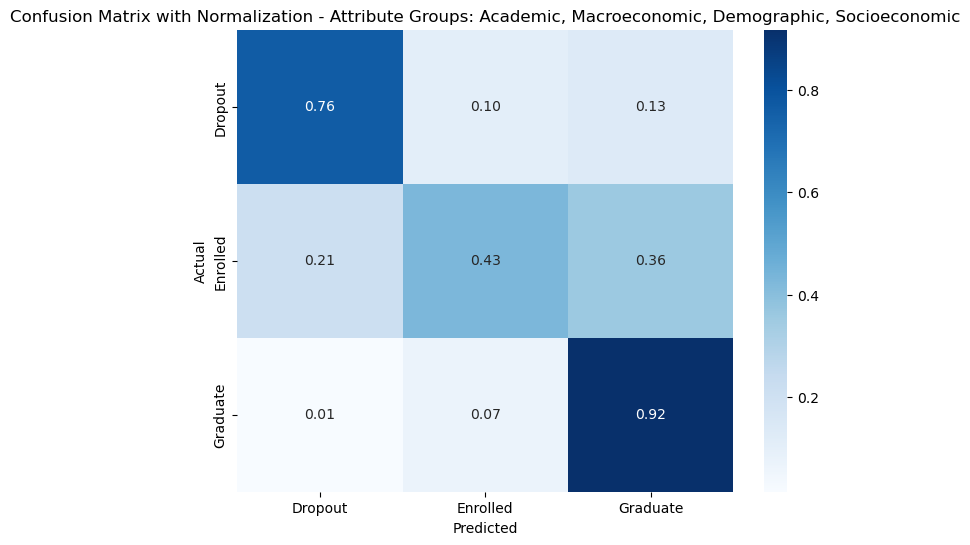

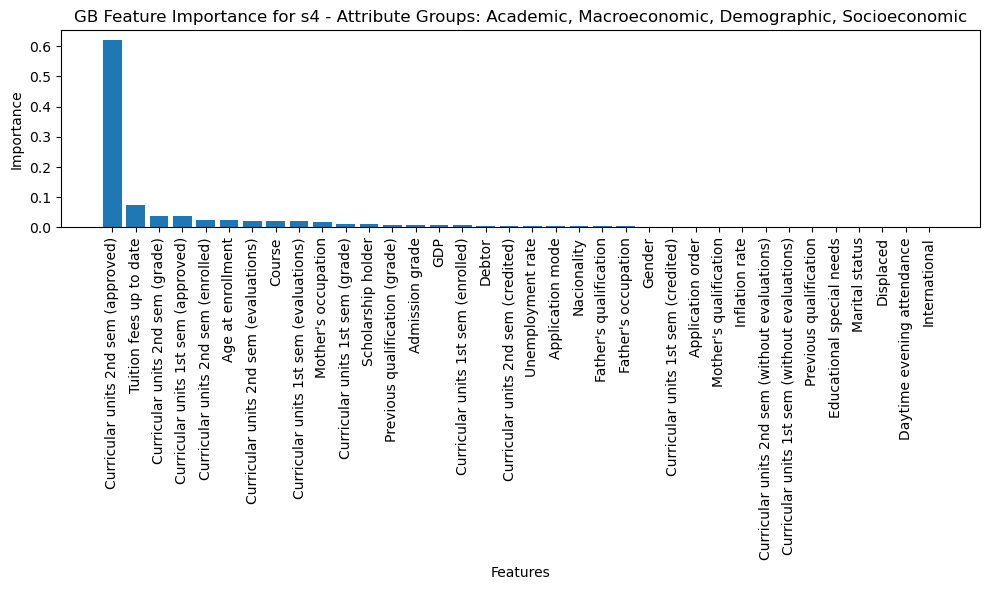

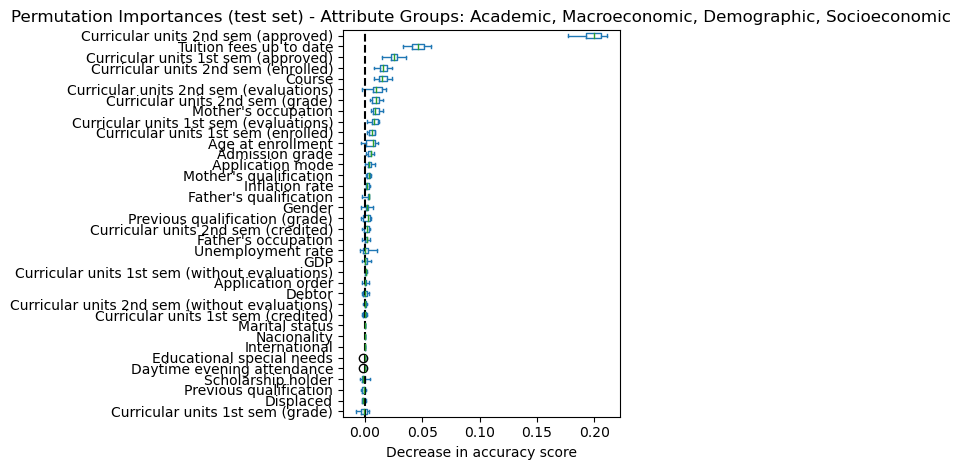

-------------------------------------------------------------

Results for s5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.6161
              precision    recall  f1-score   support

     Dropout       0.66      0.58      0.62       289
    Enrolled       0.42      0.05      0.09       168
    Graduate       0.60      0.87      0.71       413

    accuracy                           0.62       870
   macro avg       0.56      0.50      0.47       870
weighted avg       0.59      0.62      0.56       870



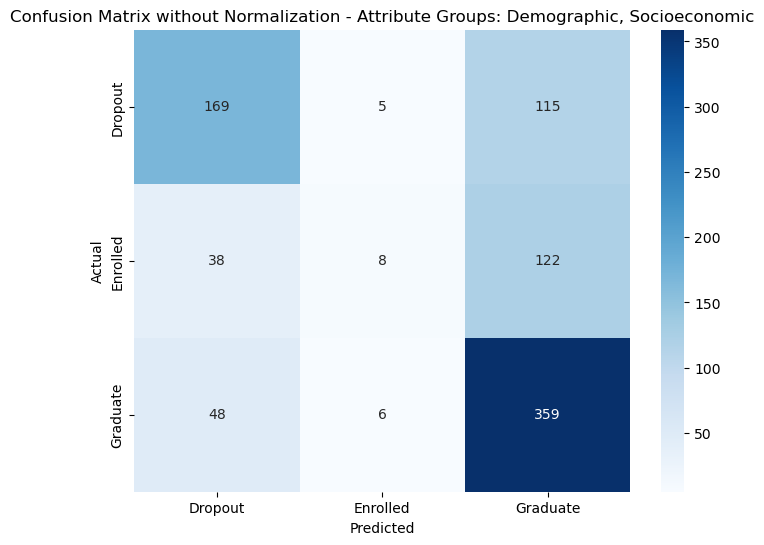

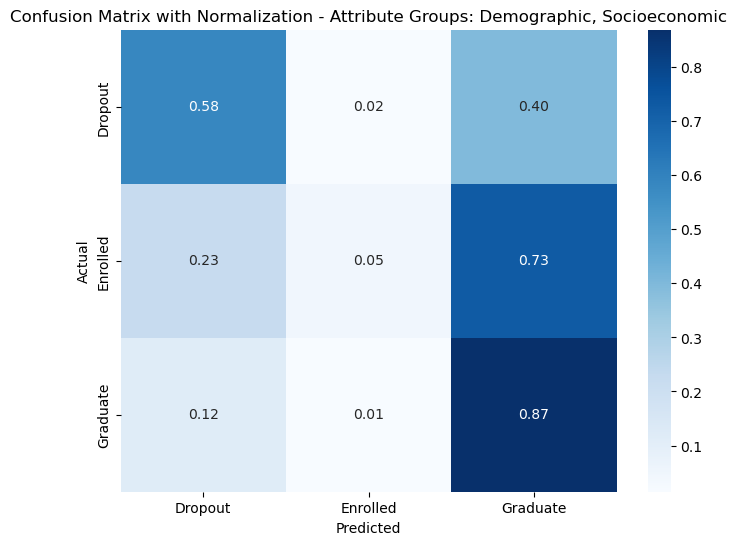

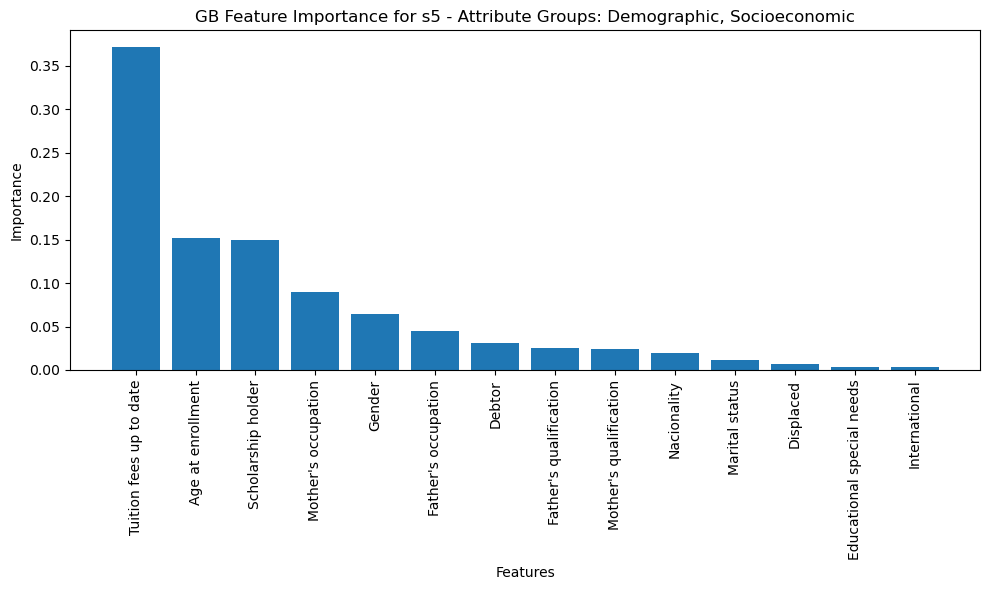

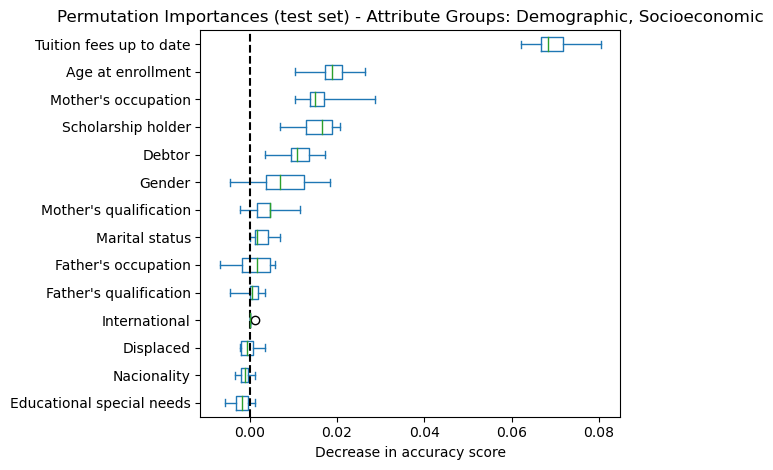

-------------------------------------------------------------



In [135]:
dataframes = [s1, s2, s3, s4, s5]  

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]




results = []
for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=76)
 
    GB_classifier = GradientBoostingClassifier( random_state=76)
    GB_classifier.fit(X_train, y_train)
    predictions = GB_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(y_test, predictions, target_names=target_names)
    results.append((accuracy, report))

    print(f"Results for s{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    # Confusion Matrix without normalization
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    feature_importance = GB_classifier.feature_importances_
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'GB Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    result = permutation_importance(GB_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_train.columns[sorted_importances_idx],
    )

    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances (test set) - Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    plt.show()
    

    print("-------------------------------------------------------------\n")


The 5 datasets with XGB Classifier



Results for s1:
Attribute Groups: Academic, Macroeconomic
Accuracy: 0.7460
              precision    recall  f1-score   support

     Dropout       0.78      0.71      0.74       289
    Enrolled       0.49      0.38      0.43       168
    Graduate       0.80      0.92      0.85       413

    accuracy                           0.75       870
   macro avg       0.69      0.67      0.68       870
weighted avg       0.73      0.75      0.74       870



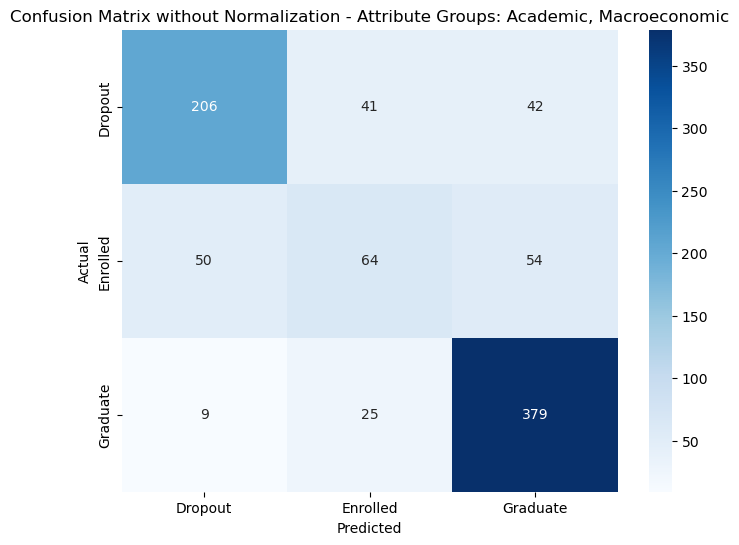

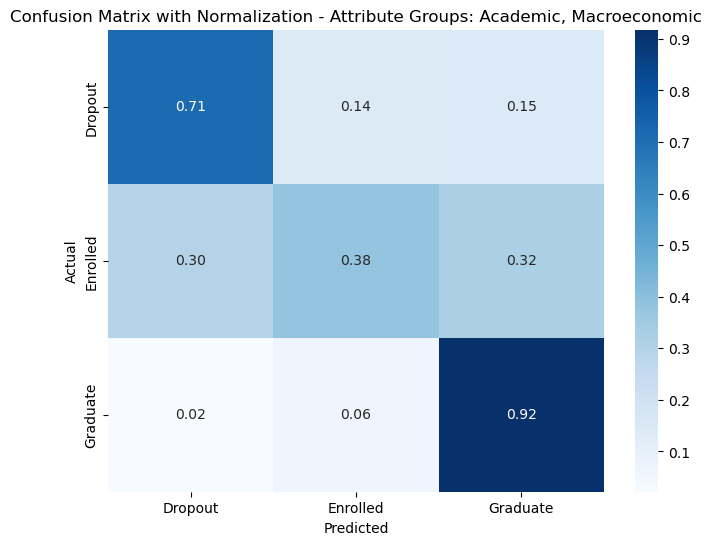

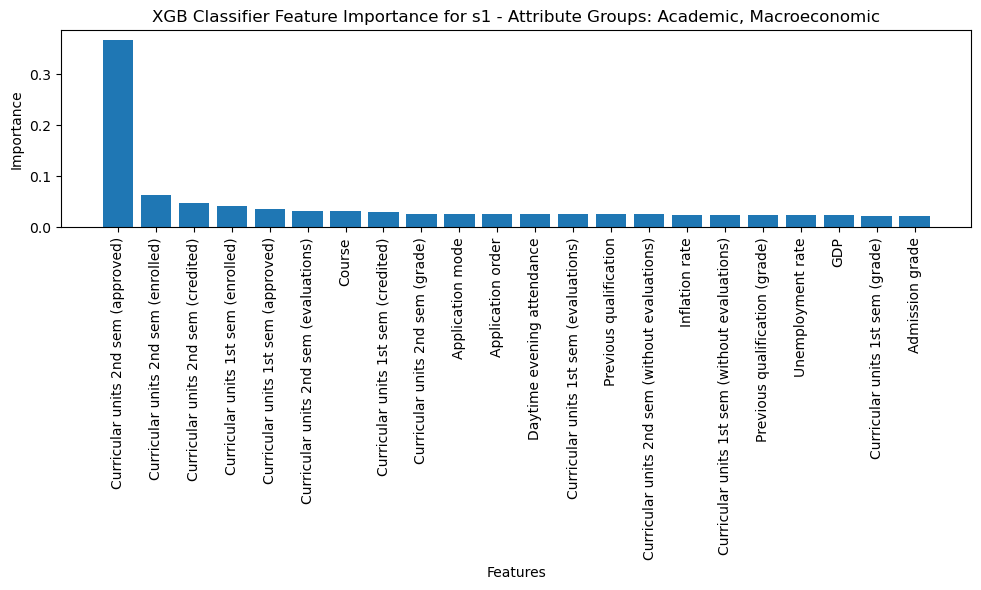

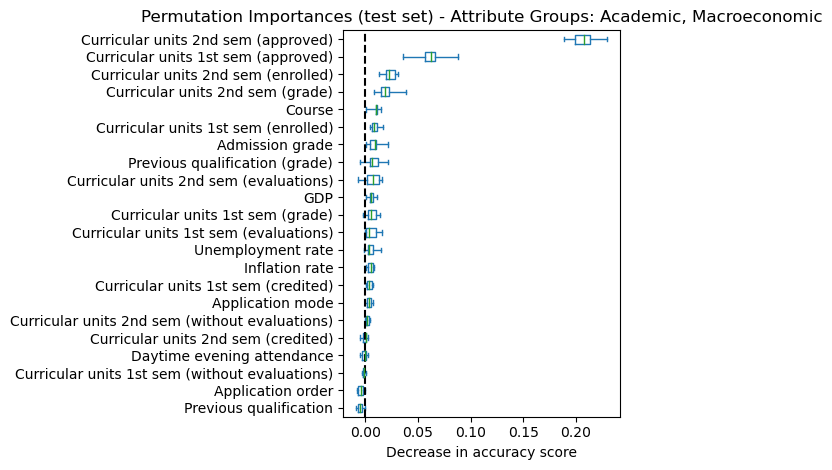

-------------------------------------------------------------

Results for s2:
Attribute Groups: Academic, Macroeconomics, Demographic
Accuracy: 0.7517
              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       289
    Enrolled       0.53      0.40      0.46       168
    Graduate       0.79      0.90      0.84       413

    accuracy                           0.75       870
   macro avg       0.70      0.68      0.69       870
weighted avg       0.74      0.75      0.74       870



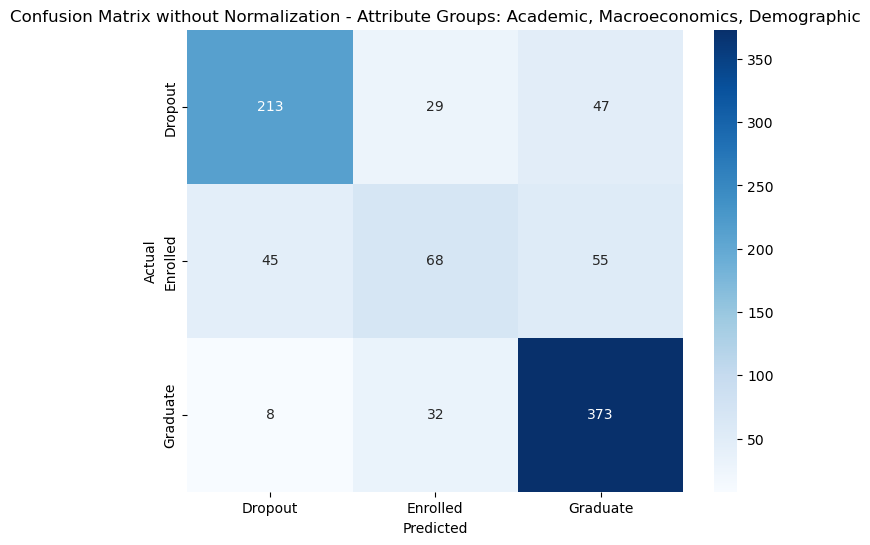

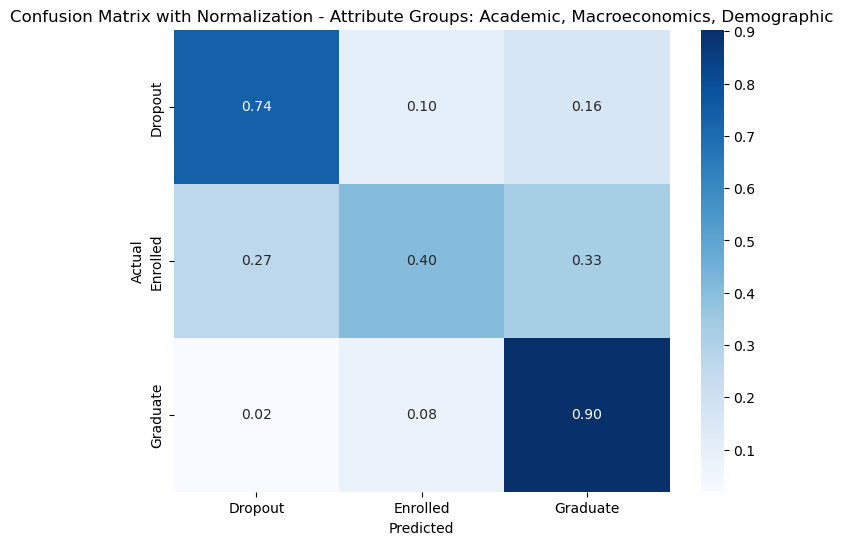

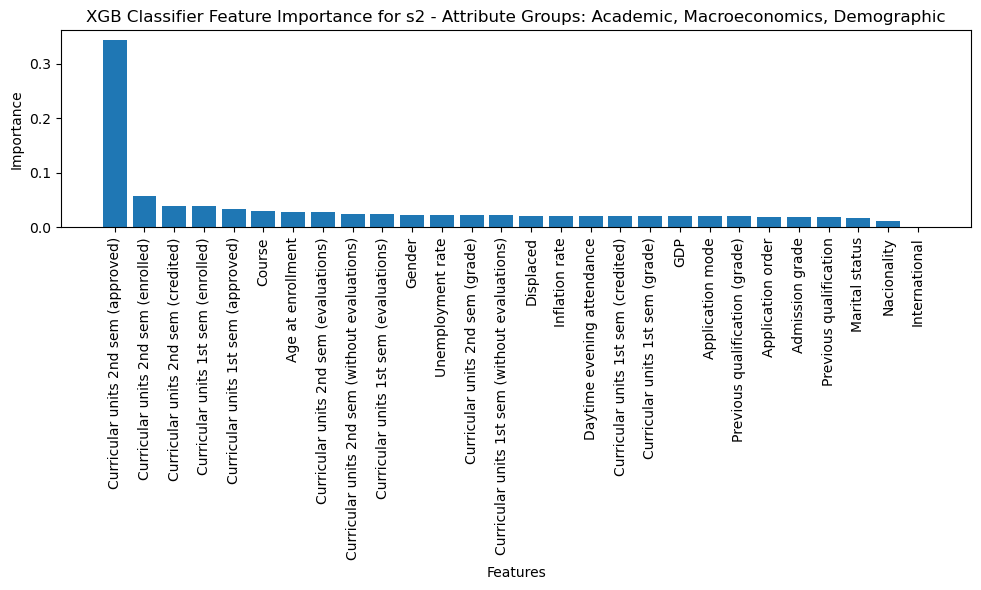

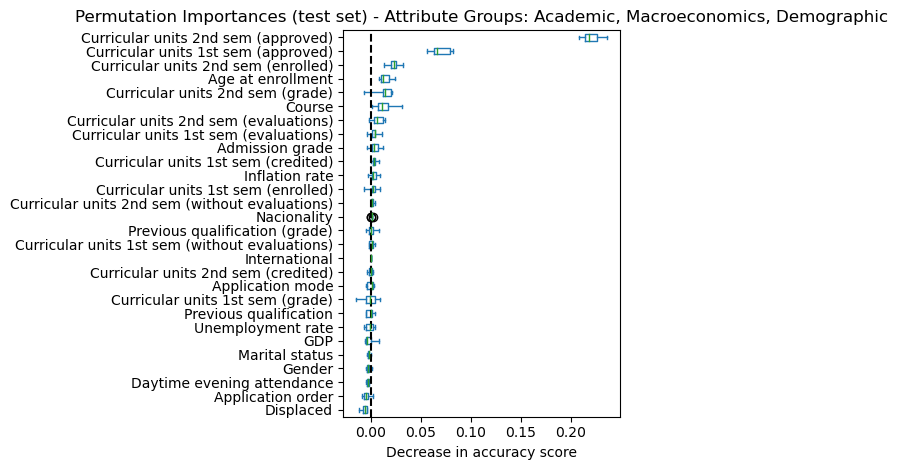

-------------------------------------------------------------

Results for s3:
Attribute Groups: Academic, Macroeconomics, Socioeconomic
Accuracy: 0.7690
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       289
    Enrolled       0.56      0.45      0.50       168
    Graduate       0.81      0.92      0.86       413

    accuracy                           0.77       870
   macro avg       0.72      0.70      0.71       870
weighted avg       0.76      0.77      0.76       870



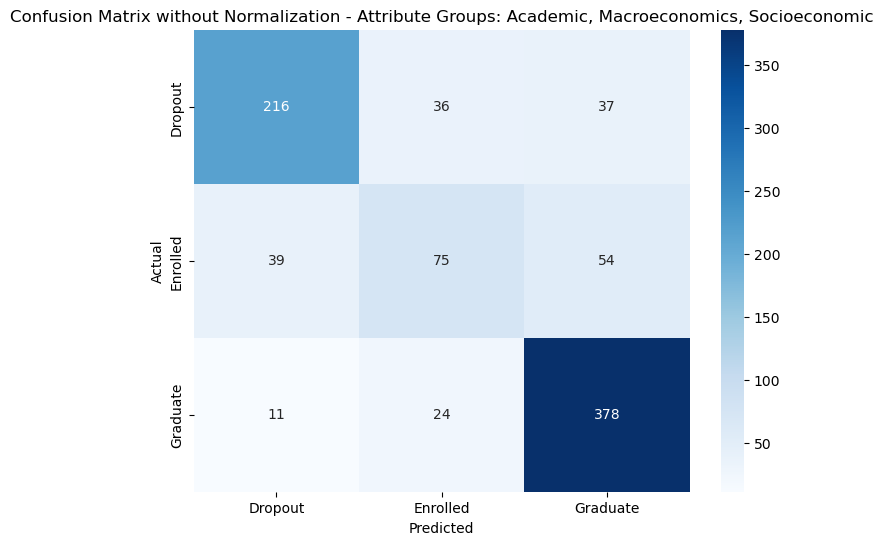

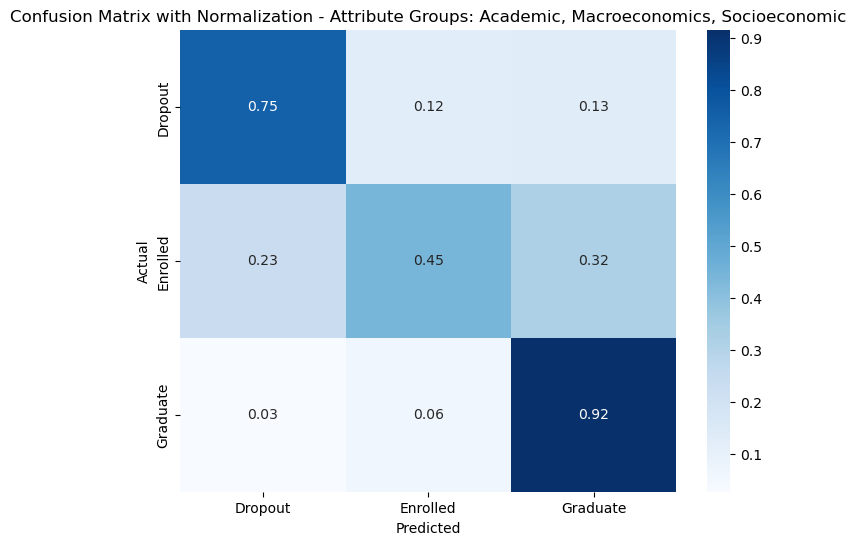

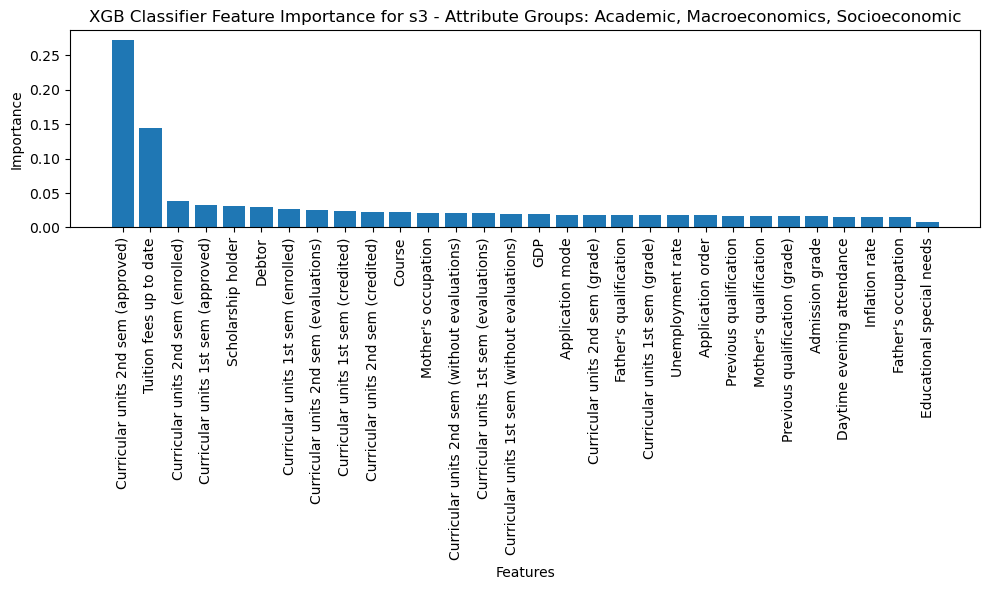

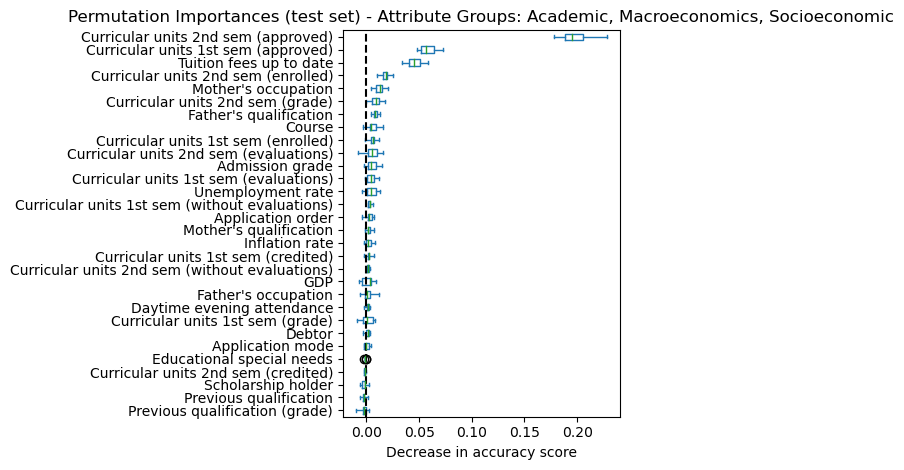

-------------------------------------------------------------

Results for s4:
Attribute Groups: Academic, Macroeconomic, Demographic, Socioeconomic
Accuracy: 0.7736
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       289
    Enrolled       0.56      0.45      0.50       168
    Graduate       0.81      0.91      0.85       413

    accuracy                           0.77       870
   macro avg       0.73      0.71      0.72       870
weighted avg       0.76      0.77      0.77       870



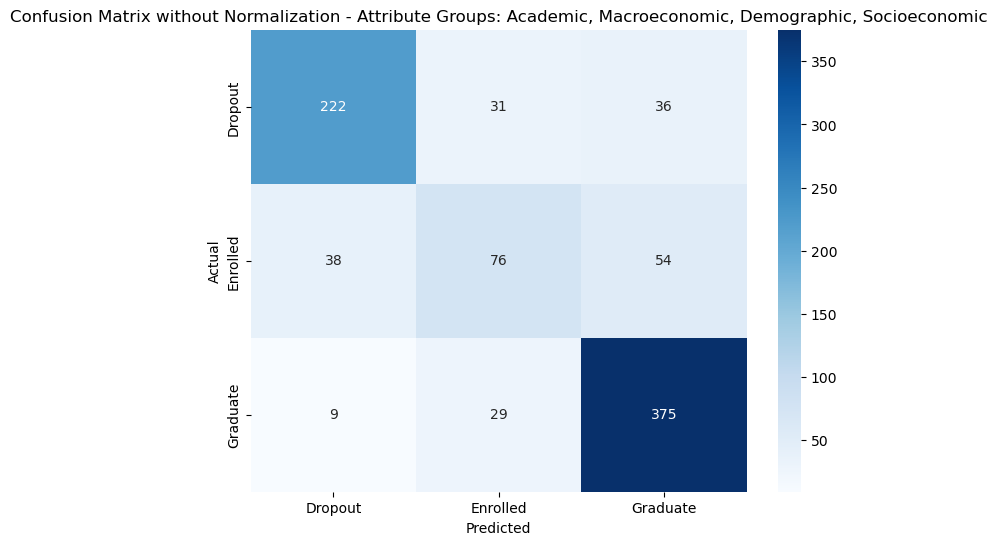

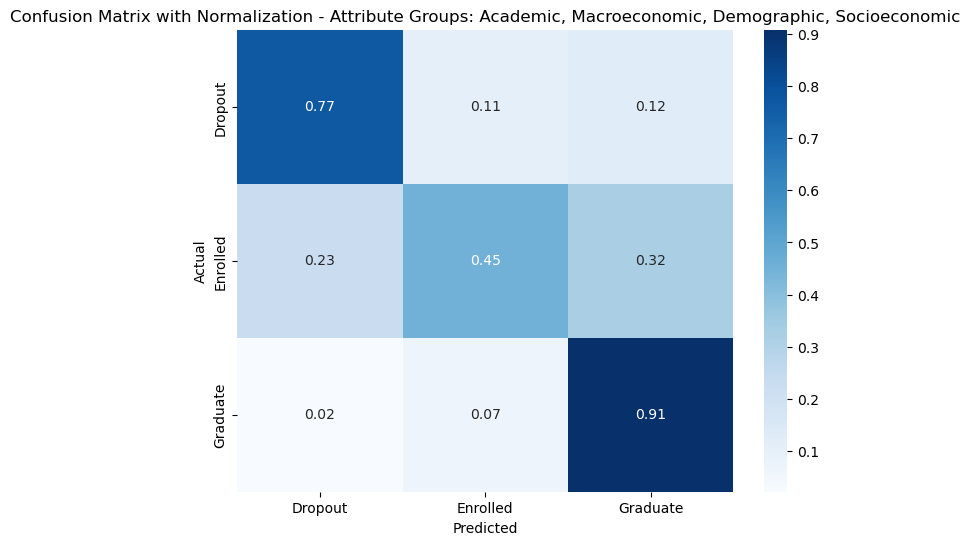

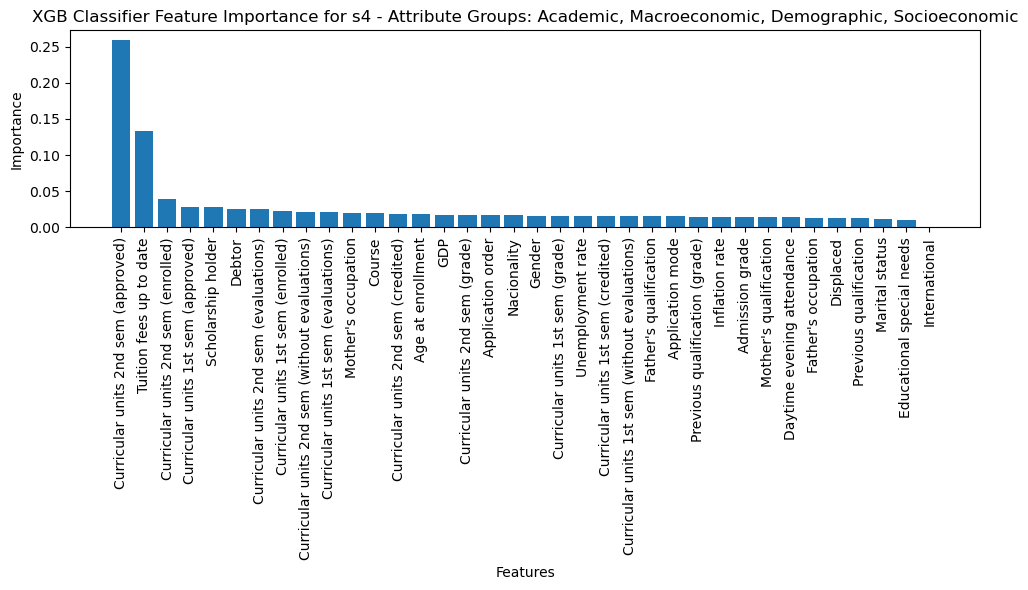

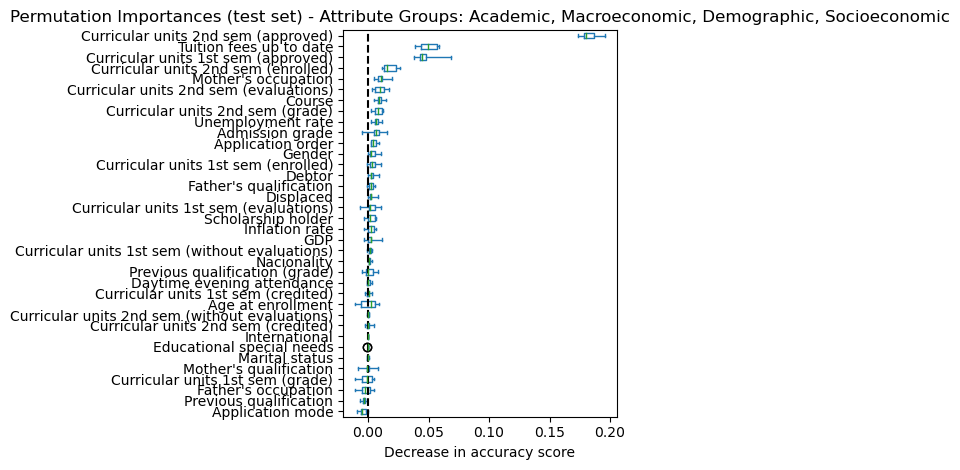

-------------------------------------------------------------

Results for s5:
Attribute Groups: Demographic, Socioeconomic
Accuracy: 0.6000
              precision    recall  f1-score   support

     Dropout       0.65      0.56      0.60       289
    Enrolled       0.36      0.15      0.22       168
    Graduate       0.61      0.81      0.69       413

    accuracy                           0.60       870
   macro avg       0.54      0.51      0.50       870
weighted avg       0.57      0.60      0.57       870



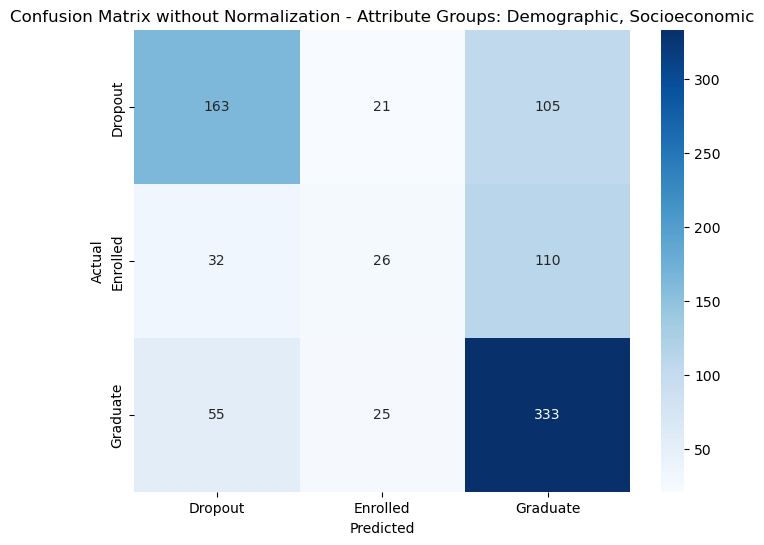

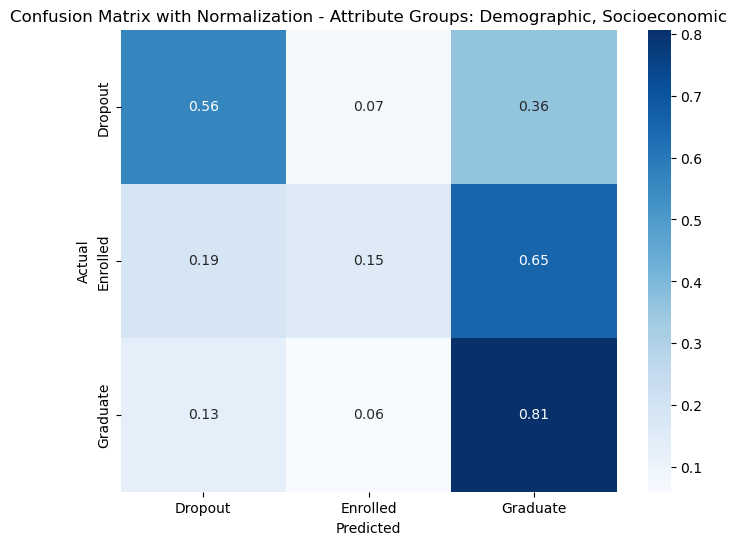

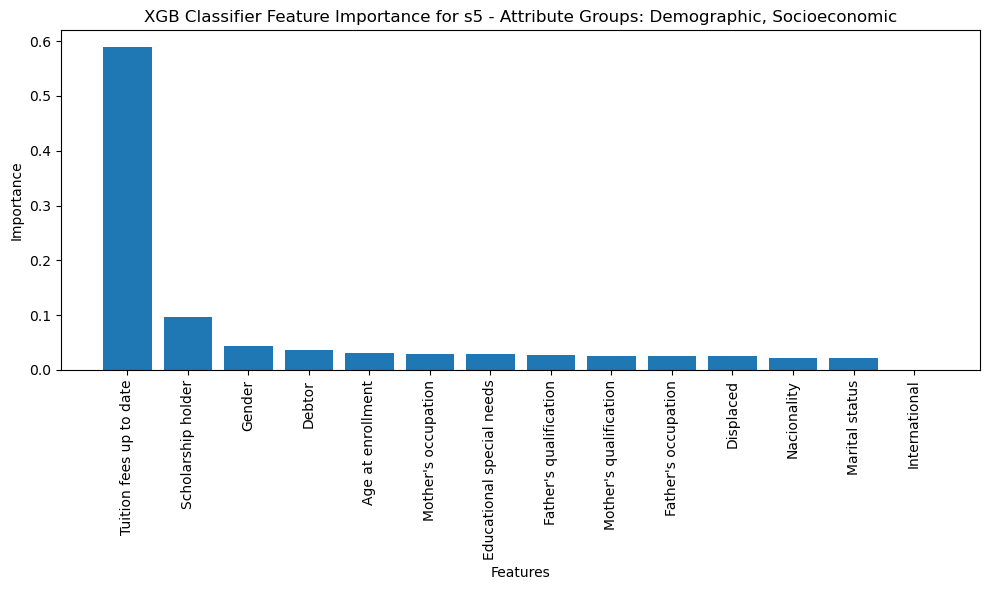

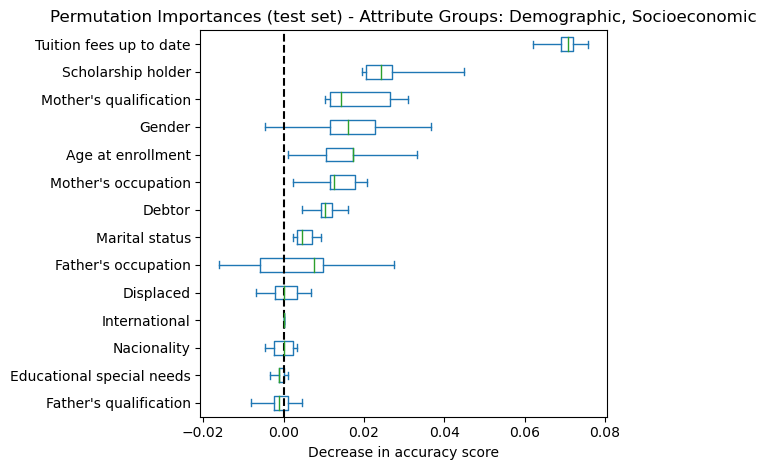

-------------------------------------------------------------



In [136]:


dataframes = [s1, s2, s3, s4, s5]  # 

attribute_groups = [
    ['Academic', 'Macroeconomic'],
    ['Academic', 'Macroeconomics', 'Demographic'],
    ['Academic', 'Macroeconomics', 'Socioeconomic'],
    ['Academic', 'Macroeconomic', 'Demographic', 'Socioeconomic'],
    ['Demographic', 'Socioeconomic']
]


results = []
for i, df in enumerate(dataframes, 1):
    target = df["Target"]
    features = df.drop("Target", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=76)
    xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, random_state=76)
    xgb_classifier.fit(X_train, y_train)
    predictions = xgb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    target_names = ['Dropout', 'Enrolled', 'Graduate']
    report = classification_report(y_test, predictions, target_names=target_names)
    results.append((accuracy, report))

    print(f"Results for s{i}:")
    print(f"Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)

    # Confusion Matrix without normalization
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix without Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix with normalization
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix with Normalization - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance
    feature_importance = xgb_classifier.feature_importances_
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
    plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'XGB Classifier Feature Importance for s{i} - Attribute Groups: {", ".join(attribute_groups[i - 1])}')
    plt.tight_layout()
    plt.show()

    # Permutation Importance
    result = permutation_importance(xgb_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(
        result.importances[sorted_importances_idx].T,
        columns=X_test.columns[sorted_importances_idx],
    )

    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances (test set) - Attribute Groups: {', '.join(attribute_groups[i - 1])}")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    plt.show()

    

    print("-------------------------------------------------------------\n")


Model Random Forest


| Subset | Attribute Groups                           | Accuracy | Precision (Dropout) | Precision (Enrolled) | Precision (Graduate) | Recall (Dropout) | Recall (Enrolled) | Recall (Graduate) | F1-Score (Dropout) | F1-Score (Enrolled) | F1-Score (Graduate) |
|--------|--------------------------------------------|----------|----------------------|-----------------------|----------------------|------------------|-------------------|-------------------|---------------------|----------------------|---------------------|
| s1     | Academic, Macroeconomic                   | 0.7448   | 0.77                 | 0.50                  | 0.78                 | 0.75             | 0.32              | 0.92              | 0.76                | 0.39                 | 0.84                |
| s2     | Academic, Macroeconomics, Demographic      | 0.7575   | 0.79                 | 0.56                  | 0.78                 | 0.76             | 0.33              | 0.93              | 0.77                | 0.42                 | 0.85                |
| s3     | Academic, Macroeconomics, Socioeconomic    | 0.7805   | 0.83                 | 0.60                  | 0.79                 | 0.79             | 0.40              | 0.93              | 0.81                | 0.48                 | 0.86                |
| s4     | Academic, Macroeconomic, Demographic, Socioeconomic | 0.7701   | 0.82          | 0.55                  | 0.80                 | 0.77             | 0.39              | 0.92              | 0.80                | 0.46                 | 0.85                |
| s5     | Demographic, Socioeconomic                | 0.5724   | 0.60                 | 0.27                  | 0.61                 | 0.58             | 0.15              | 0.74              | 0.59                | 0.19                 | 0.67                |





Model Gardien Boosting




| Subset | Attribute Groups                           | Accuracy | Precision (Dropout) | Precision (Enrolled) | Precision (Graduate) | Recall (Dropout) | Recall (Enrolled) | Recall (Graduate) | F1-Score (Dropout) | F1-Score (Enrolled) | F1-Score (Graduate) |
|--------|--------------------------------------------|----------|----------------------|-----------------------|----------------------|------------------|-------------------|-------------------|---------------------|----------------------|---------------------|
| s1     | Academic, Macroeconomic                   | 0.7310   | 0.77                 | 0.44                  | 0.78                 | 0.71             | 0.32              | 0.92              | 0.74                | 0.37                 | 0.84                |
| s2     | Academic, Macroeconomics, Demographic      | 0.7506   | 0.80                 | 0.52                  | 0.78                 | 0.72             | 0.39              | 0.92              | 0.76                | 0.44                 | 0.85                |
| s3     | Academic, Macroeconomics, Socioeconomic    | 0.7759   | 0.84                 | 0.56                  | 0.80                 | 0.77             | 0.44              | 0.92              | 0.80                | 0.49                 | 0.85                |
| s4     | Academic, Macroeconomic, Demographic, Socioeconomic | 0.7724   | 0.84          | 0.55                  | 0.79                 | 0.76             | 0.43              | 0.92              | 0.80                | 0.48                 | 0.85                |
| s5     | Demographic, Socioeconomic                | 0.6161   | 0.66                 | 0.42                  | 0.60                 | 0.58             | 0.05              | 0.87              | 0.62                | 0.09                 | 0.71                |



Model XGBoost


| Subset | Attribute Groups                           | Accuracy | Precision (Dropout) | Precision (Enrolled) | Precision (Graduate) | Recall (Dropout) | Recall (Enrolled) | Recall (Graduate) | F1-Score (Dropout) | F1-Score (Enrolled) | F1-Score (Graduate) |
|--------|--------------------------------------------|----------|----------------------|-----------------------|----------------------|------------------|-------------------|-------------------|---------------------|----------------------|---------------------|
| s1     | Academic, Macroeconomic                   | 0.7460   | 78.0                 | 49.0                  | 80.0                 | 71.0             | 38.0              | 92.0              | 74.0                | 43.0                 | 85.0                |
| s2     | Academic, Macroeconomics, Demographic      | 0.7517   | 80.0                 | 53.0                  | 79.0                 | 74.0             | 40.0              | 90.0              | 77.0                | 46.0                 | 84.0                |
| s3     | Academic, Macroeconomics, Socioeconomic    | 0.7690   | 81.0                 | 56.0                  | 81.0                 | 75.0             | 45.0              | 92.0              | 78.0                | 50.0                 | 86.0                |
| s4     | Academic, Macroeconomic, Demographic, Socioeconomic | 0.7736   | 83.0          | 56.0                  | 81.0                 | 77.0             | 45.0              | 91.0              | 80.0                | 50.0                 | 85.0                |
| s5     | Demographic, Socioeconomic                | 0.6000  | 65.0                 | 36.0                  | 61.0                 | 56.0             | 15.0              | 81.0              | 60.0                | 22.0                 | 69.0                |



In [137]:
end = datetime.now()
 
print("Notebook ended at ", end )


Notebook ended at  2023-11-21 16:28:51.326451
